**102: 1. Veri seti, 3 Katmanlı MLP tipli modelleme**
TRAIN

Amaç: 16 ürün için çok çıkışlı regresyon tahmini yapmak.

Girdi:  
- X1_train_multi.npy → Fiyat, gecikme vb. özellikler  
- X2_train_multi.npy → Tarih/Zaman özellikleri (saat, gün vb.)  
- X3_train_multi.npy → Ek yardımcı değişkenler  

Çıktı: Her ürün için satış tahminleri.

Model: 3 gizli katmanlı MLP (Multi-Layer Perceptron)
- Katman 1: X1
- Katman 2: Katman1 çıktısı + X2
- Katman 3: Katman2 çıktısı + X3

Aktivasyon: ReLU  

Kayıp Fonksiyonu: Mean Squared Error (MSE)

Optimizasyon: El yazması geri yayılım (backpropagation) + Mini Batch + Early Stopping

Çıktılar: Eğitim & test verileri üzerinden MSE öğrenme eğrisi (Learning Curve) çizilir.
- En iyi ağırlıklar: models/102_W1.npy 102_b1.npy … 102_W4.npy 102_b4.npy dosyalarına kaydedilir.

1- Kütüphaneler & Veri Yükleme

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

X1_train = np.load('npy/X1_train_multi.npy')
X2_train = np.load('npy/X2_train_multi.npy')
X3_train = np.load('npy/X3_train_multi.npy')
y_train = np.load('npy/y_train_multi.npy')

X1_test = np.load('npy/X1_test_multi.npy')
X2_test = np.load('npy/X2_test_multi.npy')
X3_test = np.load('npy/X3_test_multi.npy')
y_test = np.load('npy/y_test_multi.npy')

print(f"Train X1: {X1_train.shape} | X2: {X2_train.shape} | X3: {X3_train.shape} | y: {y_train.shape}")


Train X1: (210239, 48) | X2: (210239, 4) | X3: (210239, 0) | y: (210239, 16)


2- Parametreler & Grid Search Hazırlığı

In [6]:
num_outputs = y_train.shape[1]

hd_list = [16]
lr_list = [0.001]
batch_size_list = [4]

epochs = 50
patience = 7

if not os.path.exists('models'):
    os.makedirs('models')

def relu(x): return np.maximum(0, x)
def relu_derivative(x): return (x > 0).astype(float)

best_mse_global = float('inf')
best_config = None


3- Grid Search Döngüsü


Deneme: hd1=8, hd2=8, hd3=8, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2201 | Test MSE: 0.2092
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 7 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 14 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 15 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 16 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 16
Kombinasyon En iyi Test MSE: 0.2087


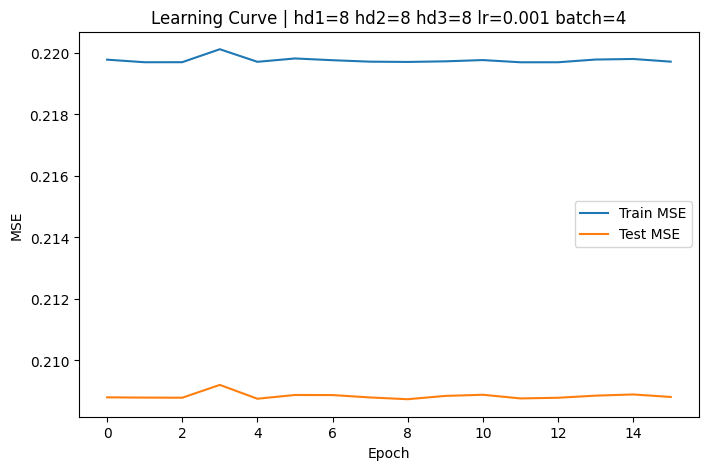


Deneme: hd1=8, hd2=8, hd3=8, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2199 | Test MSE: 0.2089
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 6 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 12
Kombinasyon En iyi Test MSE: 0.2087


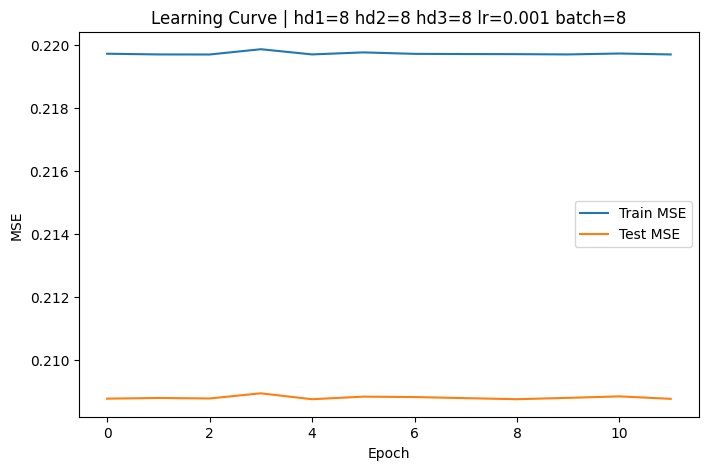


Deneme: hd1=8, hd2=8, hd3=8, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 12
Kombinasyon En iyi Test MSE: 0.2088


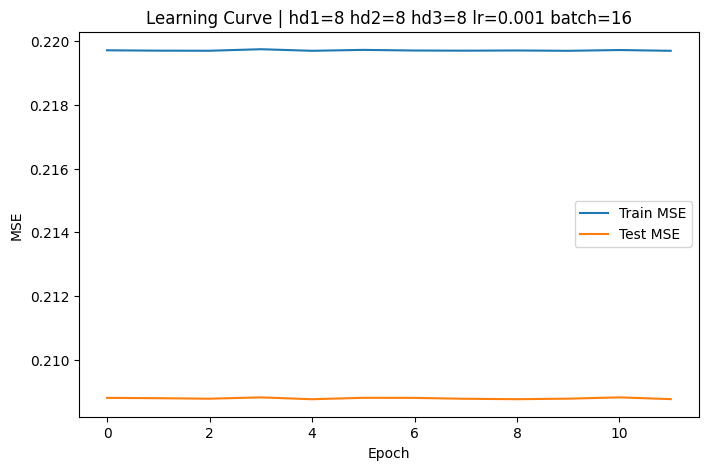


Deneme: hd1=8, hd2=8, hd3=16, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2168 | Test MSE: 0.2069
Epoch 2 | Train MSE: 0.2076 | Test MSE: 0.2041
Epoch 3 | Train MSE: 0.2050 | Test MSE: 0.2015
Epoch 4 | Train MSE: 0.2039 | Test MSE: 0.1943
Epoch 5 | Train MSE: 0.2034 | Test MSE: 0.1942
Epoch 6 | Train MSE: 0.2040 | Test MSE: 0.1936
Epoch 7 | Train MSE: 0.2034 | Test MSE: 0.1950
Epoch 8 | Train MSE: 0.2028 | Test MSE: 0.1938
Epoch 9 | Train MSE: 0.2028 | Test MSE: 0.1937
Epoch 10 | Train MSE: 0.2027 | Test MSE: 0.1943
Epoch 11 | Train MSE: 0.2028 | Test MSE: 0.1939
Epoch 12 | Train MSE: 0.2023 | Test MSE: 0.1947
Epoch 13 | Train MSE: 0.2045 | Test MSE: 0.1991
Early stopping at epoch 13
Kombinasyon En iyi Test MSE: 0.1936


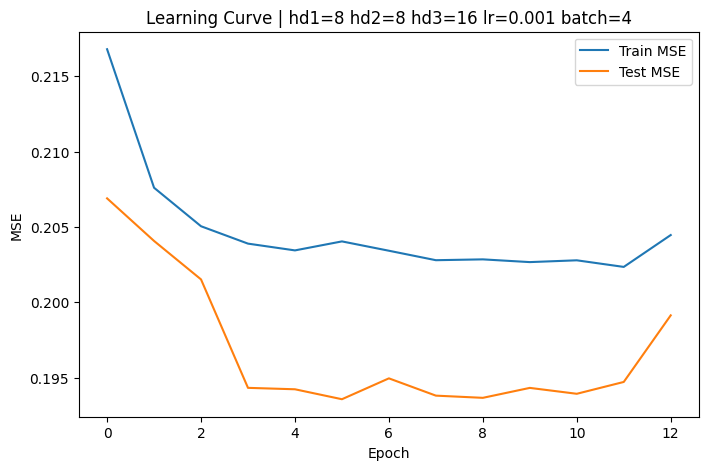


Deneme: hd1=8, hd2=8, hd3=16, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2120 | Test MSE: 0.2007
Epoch 2 | Train MSE: 0.2085 | Test MSE: 0.2034
Epoch 3 | Train MSE: 0.2062 | Test MSE: 0.2037
Epoch 4 | Train MSE: 0.2054 | Test MSE: 0.2012
Epoch 5 | Train MSE: 0.2044 | Test MSE: 0.2045
Epoch 6 | Train MSE: 0.2052 | Test MSE: 0.2022
Epoch 7 | Train MSE: 0.2051 | Test MSE: 0.2096
Epoch 8 | Train MSE: 0.2045 | Test MSE: 0.1962
Epoch 9 | Train MSE: 0.2036 | Test MSE: 0.1966
Epoch 10 | Train MSE: 0.2037 | Test MSE: 0.1953
Epoch 11 | Train MSE: 0.2038 | Test MSE: 0.1970
Epoch 12 | Train MSE: 0.2033 | Test MSE: 0.2028
Epoch 13 | Train MSE: 0.2056 | Test MSE: 0.2121
Epoch 14 | Train MSE: 0.2054 | Test MSE: 0.1949
Epoch 15 | Train MSE: 0.2033 | Test MSE: 0.1974
Epoch 16 | Train MSE: 0.2031 | Test MSE: 0.1989
Epoch 17 | Train MSE: 0.2035 | Test MSE: 0.1979
Epoch 18 | Train MSE: 0.2033 | Test MSE: 0.1944
Epoch 19 | Train MSE: 0.2028 | Test MSE: 0.1988
Epoch 20 | Train MSE: 0.2029 | Test MSE: 0.

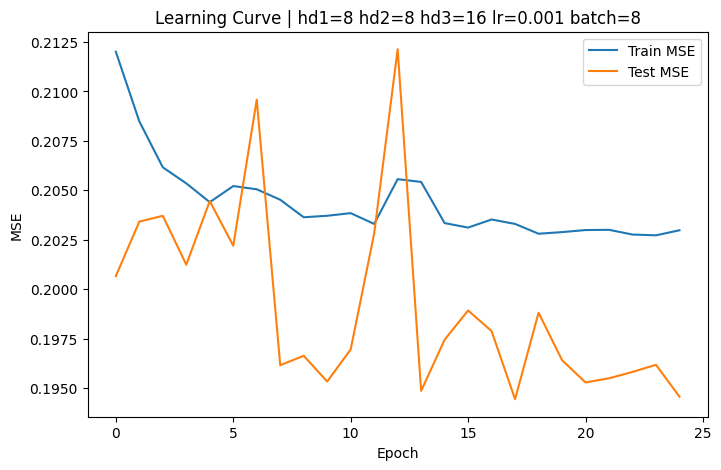


Deneme: hd1=8, hd2=8, hd3=16, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2147 | Test MSE: 0.2060
Epoch 2 | Train MSE: 0.2126 | Test MSE: 0.2028
Epoch 3 | Train MSE: 0.2088 | Test MSE: 0.2139
Epoch 4 | Train MSE: 0.2081 | Test MSE: 0.2082
Epoch 5 | Train MSE: 0.2075 | Test MSE: 0.2017
Epoch 6 | Train MSE: 0.2065 | Test MSE: 0.2027
Epoch 7 | Train MSE: 0.2055 | Test MSE: 0.2119
Epoch 8 | Train MSE: 0.2052 | Test MSE: 0.2004
Epoch 9 | Train MSE: 0.2043 | Test MSE: 0.1994
Epoch 10 | Train MSE: 0.2041 | Test MSE: 0.1974
Epoch 11 | Train MSE: 0.2042 | Test MSE: 0.1997
Epoch 12 | Train MSE: 0.2038 | Test MSE: 0.2050
Epoch 13 | Train MSE: 0.2061 | Test MSE: 0.2114
Epoch 14 | Train MSE: 0.2055 | Test MSE: 0.1972
Epoch 15 | Train MSE: 0.2035 | Test MSE: 0.1991
Epoch 16 | Train MSE: 0.2033 | Test MSE: 0.2014
Epoch 17 | Train MSE: 0.2037 | Test MSE: 0.1996
Epoch 18 | Train MSE: 0.2037 | Test MSE: 0.1949
Epoch 19 | Train MSE: 0.2038 | Test MSE: 0.2038
Epoch 20 | Train MSE: 0.2032 | Test MSE: 0

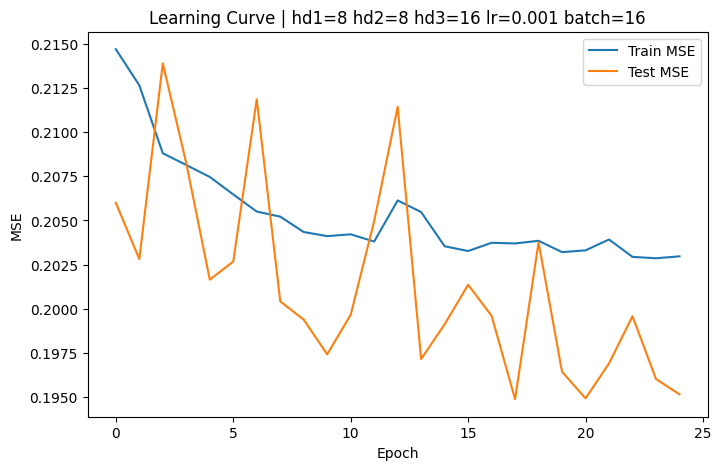


Deneme: hd1=8, hd2=8, hd3=32, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2199 | Test MSE: 0.2089
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 12 | Train MSE: 0.2084 | Test MSE: 0.2021
Epoch 13 | Train MSE: 0.2075 | Test MSE: 0.2011
Epoch 14 | Train MSE: 0.2052 | Test MSE: 0.2072
Epoch 15 | Train MSE: 0.2053 | Test MSE: 0.2009
Epoch 16 | Train MSE: 0.2045 | Test MSE: 0.2017
Epoch 17 | Train MSE: 0.2118 | Test MSE: 0.1955
Epoch 18 | Train MSE: 0.2041 | Test MSE: 0.2062
Epoch 19 | Train MSE: 0.2035 | Test MSE: 0.1978
Epoch 20 | Train MSE: 0.2066 | Test MSE: 0.

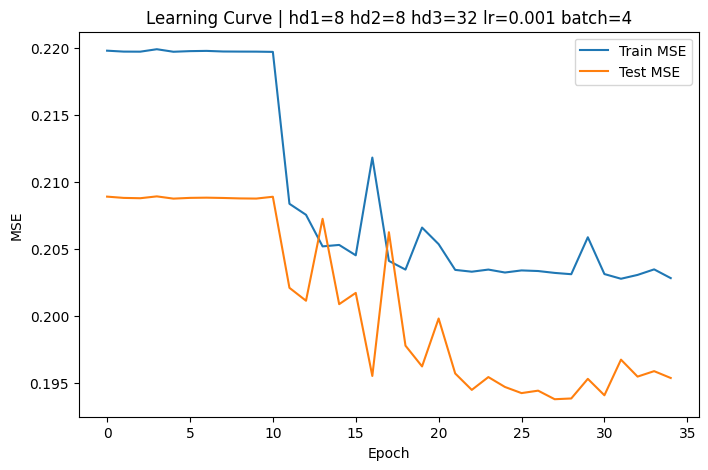


Deneme: hd1=8, hd2=8, hd3=32, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2113 | Test MSE: 0.2017
Epoch 8 | Train MSE: 0.2089 | Test MSE: 0.2037
Epoch 9 | Train MSE: 0.2072 | Test MSE: 0.1968
Epoch 10 | Train MSE: 0.2063 | Test MSE: 0.1979
Epoch 11 | Train MSE: 0.2050 | Test MSE: 0.1968
Epoch 12 | Train MSE: 0.2045 | Test MSE: 0.2014
Epoch 13 | Train MSE: 0.2061 | Test MSE: 0.2092
Epoch 14 | Train MSE: 0.2042 | Test MSE: 0.2039
Epoch 15 | Train MSE: 0.2042 | Test MSE: 0.1983
Epoch 16 | Train MSE: 0.2036 | Test MSE: 0.1989
Epoch 17 | Train MSE: 0.2081 | Test MSE: 0.1956
Epoch 18 | Train MSE: 0.2035 | Test MSE: 0.1998
Epoch 19 | Train MSE: 0.2031 | Test MSE: 0.1976
Epoch 20 | Train MSE: 0.2061 | Test MSE: 0.

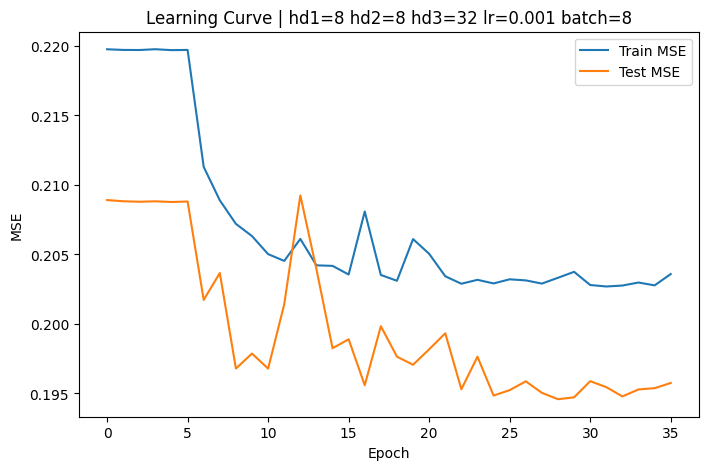


Deneme: hd1=8, hd2=8, hd3=32, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2090
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 7 | Train MSE: 0.2112 | Test MSE: 0.2014
Epoch 8 | Train MSE: 0.2098 | Test MSE: 0.2033
Epoch 9 | Train MSE: 0.2075 | Test MSE: 0.1977
Epoch 10 | Train MSE: 0.2071 | Test MSE: 0.1974
Epoch 11 | Train MSE: 0.2057 | Test MSE: 0.1988
Epoch 12 | Train MSE: 0.2055 | Test MSE: 0.2038
Epoch 13 | Train MSE: 0.2054 | Test MSE: 0.2031
Epoch 14 | Train MSE: 0.2051 | Test MSE: 0.1991
Epoch 15 | Train MSE: 0.2050 | Test MSE: 0.1976
Epoch 16 | Train MSE: 0.2045 | Test MSE: 0.2002
Epoch 17 | Train MSE: 0.2073 | Test MSE: 0.1962
Epoch 18 | Train MSE: 0.2042 | Test MSE: 0.2046
Epoch 19 | Train MSE: 0.2042 | Test MSE: 0.1984
Epoch 20 | Train MSE: 0.2054 | Test MSE: 0

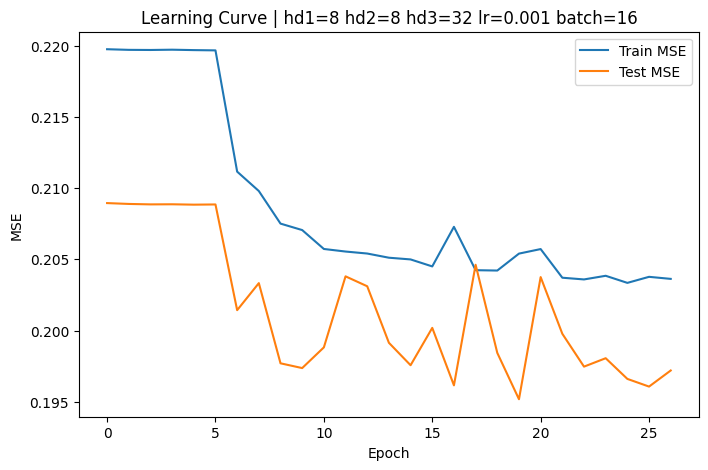


Deneme: hd1=8, hd2=16, hd3=8, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2200 | Test MSE: 0.2091
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2199 | Test MSE: 0.2090
Epoch 7 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 14 | Train MSE: 0.2200 | Test MSE: 0.2091
Epoch 15 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 16 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 16
Kombinasyon En iyi Test MSE: 0.2087


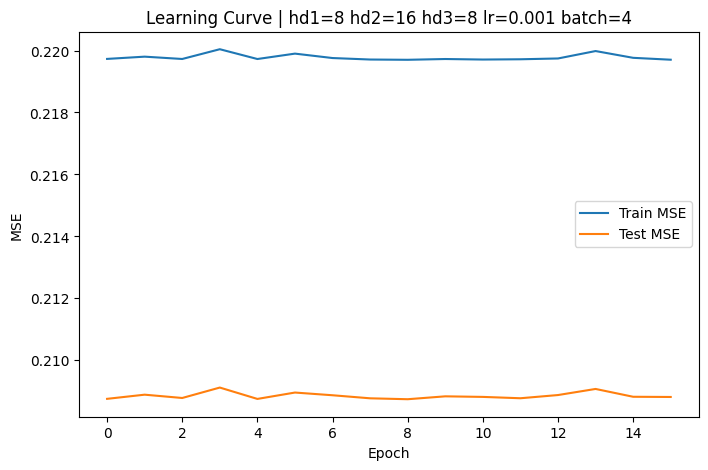


Deneme: hd1=8, hd2=16, hd3=8, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 6 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2196 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 12
Kombinasyon En iyi Test MSE: 0.2087


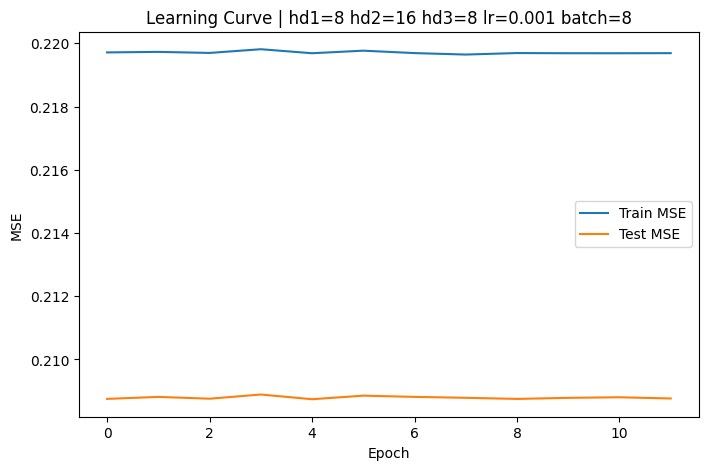


Deneme: hd1=8, hd2=16, hd3=8, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2188 | Test MSE: 0.2054
Epoch 10 | Train MSE: 0.2098 | Test MSE: 0.2008
Epoch 11 | Train MSE: 0.2084 | Test MSE: 0.1989
Epoch 12 | Train MSE: 0.2085 | Test MSE: 0.2005
Epoch 13 | Train MSE: 0.2088 | Test MSE: 0.1985
Epoch 14 | Train MSE: 0.2098 | Test MSE: 0.2043
Epoch 15 | Train MSE: 0.2068 | Test MSE: 0.1990
Epoch 16 | Train MSE: 0.2047 | Test MSE: 0.1967
Epoch 17 | Train MSE: 0.2040 | Test MSE: 0.1953
Epoch 18 | Train MSE: 0.2048 | Test MSE: 0.1968
Epoch 19 | Train MSE: 0.2037 | Test MSE: 0.1944
Epoch 20 | Train MSE: 0.2033 | Test MSE: 0

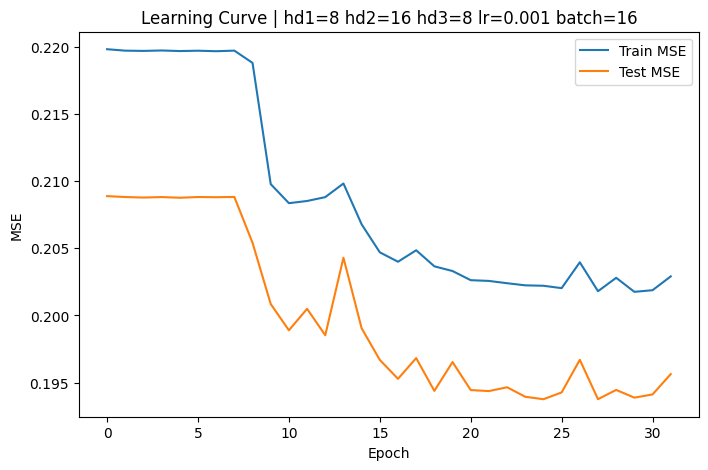


Deneme: hd1=8, hd2=16, hd3=16, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2066 | Test MSE: 0.1987
Epoch 2 | Train MSE: 0.2047 | Test MSE: 0.1956
Epoch 3 | Train MSE: 0.2042 | Test MSE: 0.1949
Epoch 4 | Train MSE: 0.2041 | Test MSE: 0.1959
Epoch 5 | Train MSE: 0.2037 | Test MSE: 0.1949
Epoch 6 | Train MSE: 0.2036 | Test MSE: 0.1941
Epoch 7 | Train MSE: 0.2037 | Test MSE: 0.1938
Epoch 8 | Train MSE: 0.2029 | Test MSE: 0.1946
Epoch 9 | Train MSE: 0.2033 | Test MSE: 0.1961
Epoch 10 | Train MSE: 0.2025 | Test MSE: 0.1971
Epoch 11 | Train MSE: 0.2063 | Test MSE: 0.1966
Epoch 12 | Train MSE: 0.2022 | Test MSE: 0.1934
Epoch 13 | Train MSE: 0.2055 | Test MSE: 0.2045
Epoch 14 | Train MSE: 0.2084 | Test MSE: 0.1990
Epoch 15 | Train MSE: 0.2032 | Test MSE: 0.1929
Epoch 16 | Train MSE: 0.2017 | Test MSE: 0.1927
Epoch 17 | Train MSE: 0.2025 | Test MSE: 0.1969
Epoch 18 | Train MSE: 0.2028 | Test MSE: 0.1936
Epoch 19 | Train MSE: 0.2017 | Test MSE: 0.1930
Epoch 20 | Train MSE: 0.2032 | Test MSE: 0

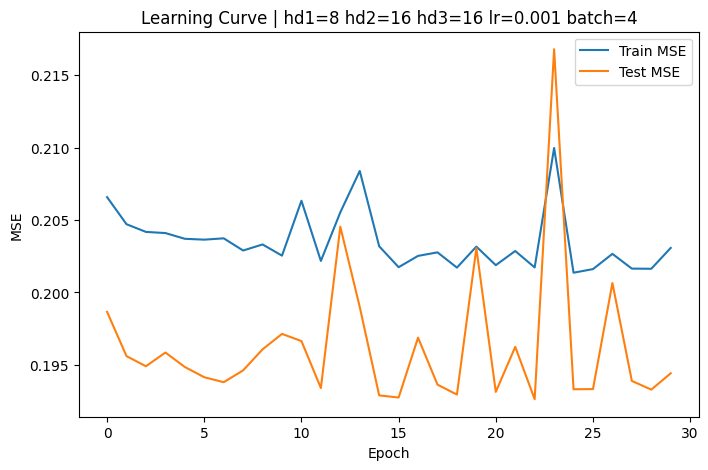


Deneme: hd1=8, hd2=16, hd3=16, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2189 | Test MSE: 0.2113
Epoch 2 | Train MSE: 0.2051 | Test MSE: 0.1974
Epoch 3 | Train MSE: 0.2043 | Test MSE: 0.1960
Epoch 4 | Train MSE: 0.2044 | Test MSE: 0.1976
Epoch 5 | Train MSE: 0.2045 | Test MSE: 0.1962
Epoch 6 | Train MSE: 0.2041 | Test MSE: 0.1949
Epoch 7 | Train MSE: 0.2039 | Test MSE: 0.1941
Epoch 8 | Train MSE: 0.2036 | Test MSE: 0.1951
Epoch 9 | Train MSE: 0.2032 | Test MSE: 0.1960
Epoch 10 | Train MSE: 0.2031 | Test MSE: 0.1977
Epoch 11 | Train MSE: 0.2049 | Test MSE: 0.1951
Epoch 12 | Train MSE: 0.2032 | Test MSE: 0.1954
Epoch 13 | Train MSE: 0.2040 | Test MSE: 0.2029
Epoch 14 | Train MSE: 0.2047 | Test MSE: 0.2002
Early stopping at epoch 14
Kombinasyon En iyi Test MSE: 0.1941


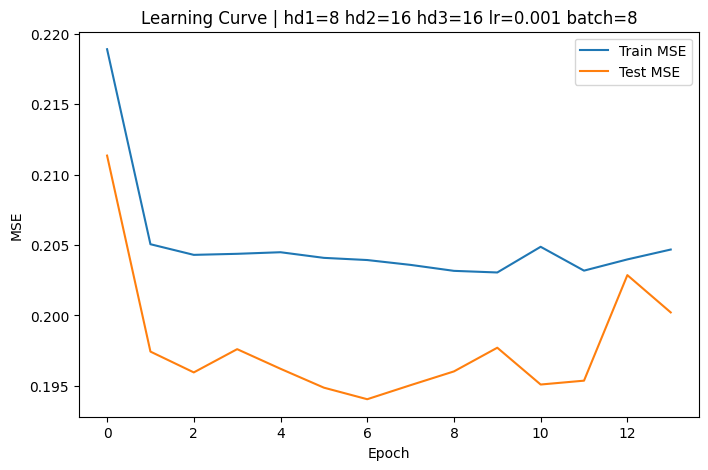


Deneme: hd1=8, hd2=16, hd3=16, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2201 | Test MSE: 0.2096
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2093
Epoch 3 | Train MSE: 0.2095 | Test MSE: 0.2037
Epoch 4 | Train MSE: 0.2054 | Test MSE: 0.1999
Epoch 5 | Train MSE: 0.2052 | Test MSE: 0.1975
Epoch 6 | Train MSE: 0.2046 | Test MSE: 0.1956
Epoch 7 | Train MSE: 0.2044 | Test MSE: 0.1950
Epoch 8 | Train MSE: 0.2041 | Test MSE: 0.1951
Epoch 9 | Train MSE: 0.2041 | Test MSE: 0.1955
Epoch 10 | Train MSE: 0.2040 | Test MSE: 0.1960
Epoch 11 | Train MSE: 0.2051 | Test MSE: 0.1946
Epoch 12 | Train MSE: 0.2041 | Test MSE: 0.1946
Epoch 13 | Train MSE: 0.2040 | Test MSE: 0.1963
Epoch 14 | Train MSE: 0.2059 | Test MSE: 0.1971
Epoch 15 | Train MSE: 0.2044 | Test MSE: 0.1943
Epoch 16 | Train MSE: 0.2038 | Test MSE: 0.1950
Epoch 17 | Train MSE: 0.2042 | Test MSE: 0.1967
Epoch 18 | Train MSE: 0.2038 | Test MSE: 0.1941
Epoch 19 | Train MSE: 0.2037 | Test MSE: 0.1944
Epoch 20 | Train MSE: 0.2048 | Test MSE: 

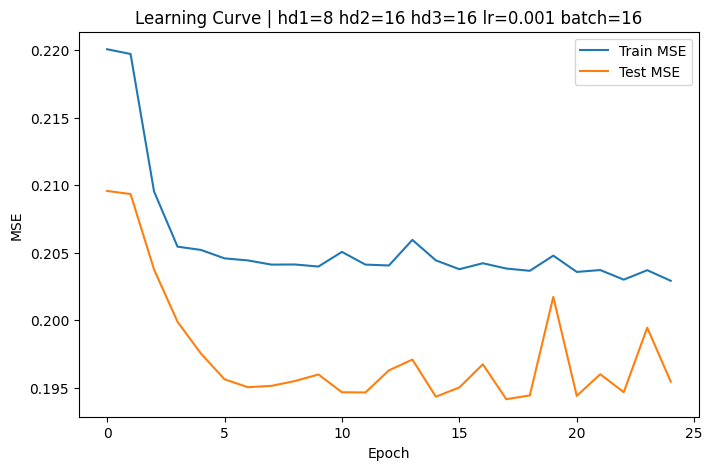


Deneme: hd1=8, hd2=16, hd3=32, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2090
Epoch 2 | Train MSE: 0.2195 | Test MSE: 0.2090
Epoch 3 | Train MSE: 0.2084 | Test MSE: 0.2017
Epoch 4 | Train MSE: 0.2052 | Test MSE: 0.1995
Epoch 5 | Train MSE: 0.2054 | Test MSE: 0.1975
Epoch 6 | Train MSE: 0.2047 | Test MSE: 0.2096
Epoch 7 | Train MSE: 0.2036 | Test MSE: 0.2009
Epoch 8 | Train MSE: 0.2033 | Test MSE: 0.1972
Epoch 9 | Train MSE: 0.2035 | Test MSE: 0.1945
Epoch 10 | Train MSE: 0.2036 | Test MSE: 0.1950
Epoch 11 | Train MSE: 0.2034 | Test MSE: 0.1961
Epoch 12 | Train MSE: 0.2032 | Test MSE: 0.1974
Epoch 13 | Train MSE: 0.2031 | Test MSE: 0.1964
Epoch 14 | Train MSE: 0.2042 | Test MSE: 0.1994
Epoch 15 | Train MSE: 0.2032 | Test MSE: 0.1985
Epoch 16 | Train MSE: 0.2033 | Test MSE: 0.1963
Early stopping at epoch 16
Kombinasyon En iyi Test MSE: 0.1945


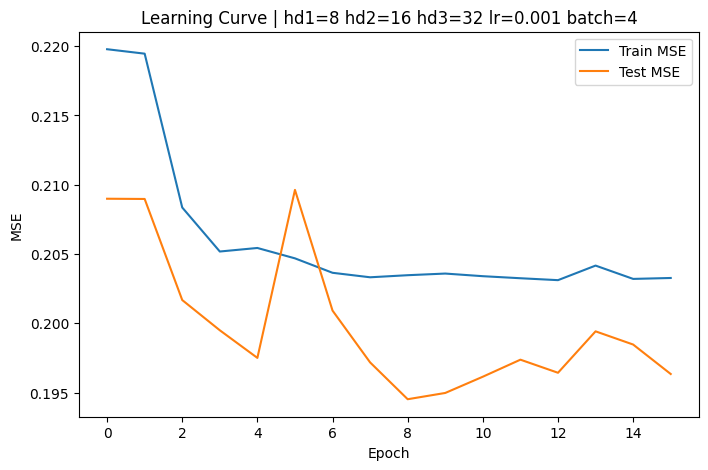


Deneme: hd1=8, hd2=16, hd3=32, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2199 | Test MSE: 0.2091
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 3 | Train MSE: 0.2092 | Test MSE: 0.2028
Epoch 4 | Train MSE: 0.2079 | Test MSE: 0.2007
Epoch 5 | Train MSE: 0.2069 | Test MSE: 0.1968
Epoch 6 | Train MSE: 0.2054 | Test MSE: 0.1965
Epoch 7 | Train MSE: 0.2044 | Test MSE: 0.1954
Epoch 8 | Train MSE: 0.2036 | Test MSE: 0.1947
Epoch 9 | Train MSE: 0.2036 | Test MSE: 0.1952
Epoch 10 | Train MSE: 0.2033 | Test MSE: 0.1953
Epoch 11 | Train MSE: 0.2031 | Test MSE: 0.1966
Epoch 12 | Train MSE: 0.2032 | Test MSE: 0.1950
Epoch 13 | Train MSE: 0.2033 | Test MSE: 0.1948
Epoch 14 | Train MSE: 0.2032 | Test MSE: 0.1956
Epoch 15 | Train MSE: 0.2034 | Test MSE: 0.1943
Epoch 16 | Train MSE: 0.2027 | Test MSE: 0.1957
Epoch 17 | Train MSE: 0.2038 | Test MSE: 0.1970
Epoch 18 | Train MSE: 0.2025 | Test MSE: 0.1942
Epoch 19 | Train MSE: 0.2029 | Test MSE: 0.1950
Epoch 20 | Train MSE: 0.2030 | Test MSE: 0

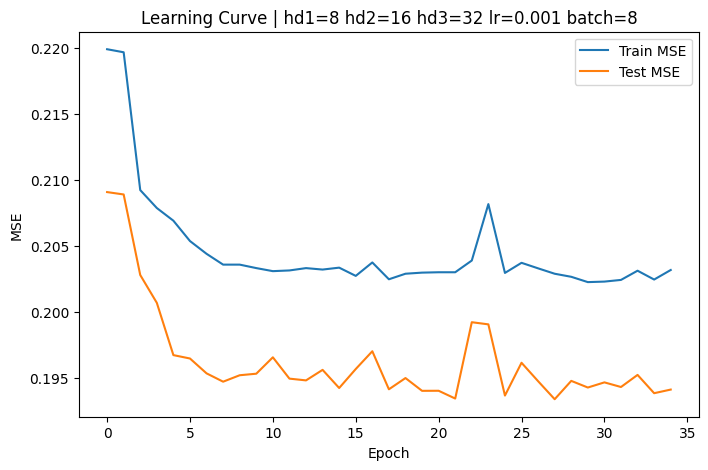


Deneme: hd1=8, hd2=16, hd3=32, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2199 | Test MSE: 0.2092
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 5 | Train MSE: 0.2118 | Test MSE: 0.2047
Epoch 6 | Train MSE: 0.2087 | Test MSE: 0.2023
Epoch 7 | Train MSE: 0.2080 | Test MSE: 0.1999
Epoch 8 | Train MSE: 0.2074 | Test MSE: 0.2016
Epoch 9 | Train MSE: 0.2058 | Test MSE: 0.1983
Epoch 10 | Train MSE: 0.2047 | Test MSE: 0.1966
Epoch 11 | Train MSE: 0.2040 | Test MSE: 0.1965
Epoch 12 | Train MSE: 0.2040 | Test MSE: 0.1968
Epoch 13 | Train MSE: 0.2037 | Test MSE: 0.1955
Epoch 14 | Train MSE: 0.2040 | Test MSE: 0.1948
Epoch 15 | Train MSE: 0.2041 | Test MSE: 0.1963
Epoch 16 | Train MSE: 0.2031 | Test MSE: 0.1943
Epoch 17 | Train MSE: 0.2030 | Test MSE: 0.1944
Epoch 18 | Train MSE: 0.2030 | Test MSE: 0.1944
Epoch 19 | Train MSE: 0.2030 | Test MSE: 0.1939
Epoch 20 | Train MSE: 0.2030 | Test MSE: 

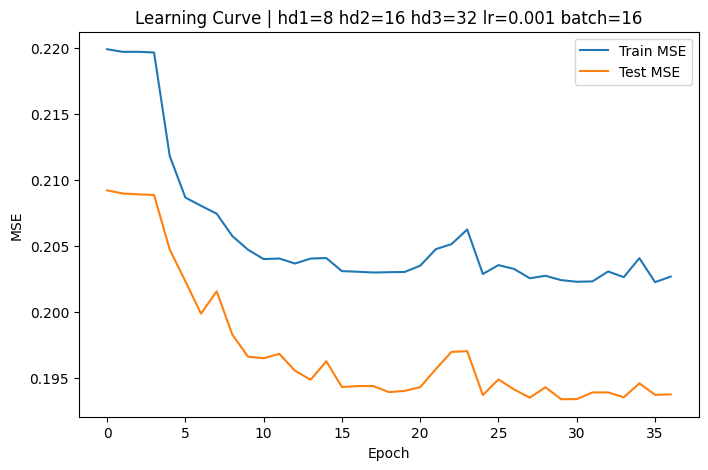


Deneme: hd1=8, hd2=32, hd3=8, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2200 | Test MSE: 0.2091
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 10 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 14 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 15 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 16 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 16
Kombinasyon En iyi Test MSE: 0.2087


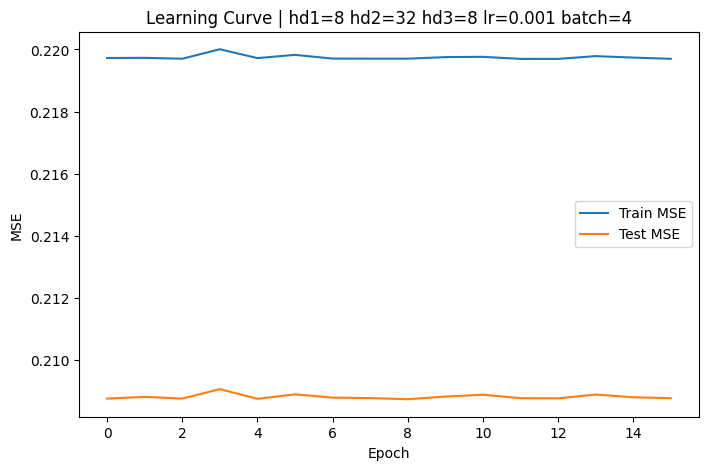


Deneme: hd1=8, hd2=32, hd3=8, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 12
Kombinasyon En iyi Test MSE: 0.2087


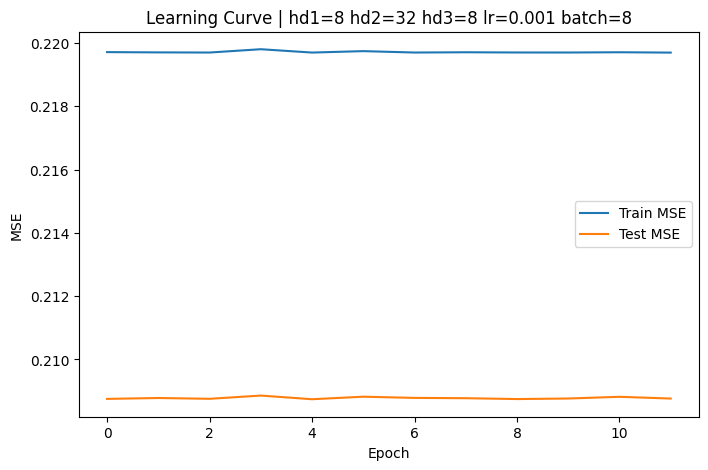


Deneme: hd1=8, hd2=32, hd3=8, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 8
Kombinasyon En iyi Test MSE: 0.2088


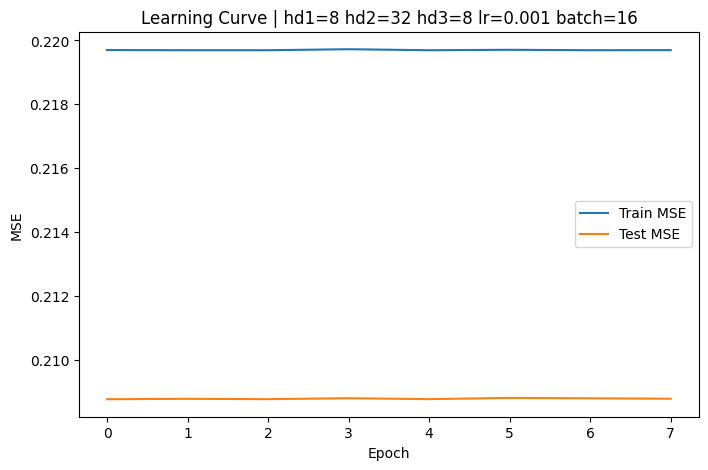


Deneme: hd1=8, hd2=32, hd3=16, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 14 | Train MSE: 0.2199 | Test MSE: 0.2090
Epoch 15 | Train MSE: 0.2140 | Test MSE: 0.2008
Epoch 16 | Train MSE: 0.2074 | Test MSE: 0.1999
Epoch 17 | Train MSE: 0.2174 | Test MSE: 0.1996
Epoch 18 | Train MSE: 0.2073 | Test MSE: 0.2203
Epoch 19 | Train MSE: 0.2047 | Test MSE: 0.2006
Epoch 20 | Train MSE: 0.2048 | Test MSE: 0

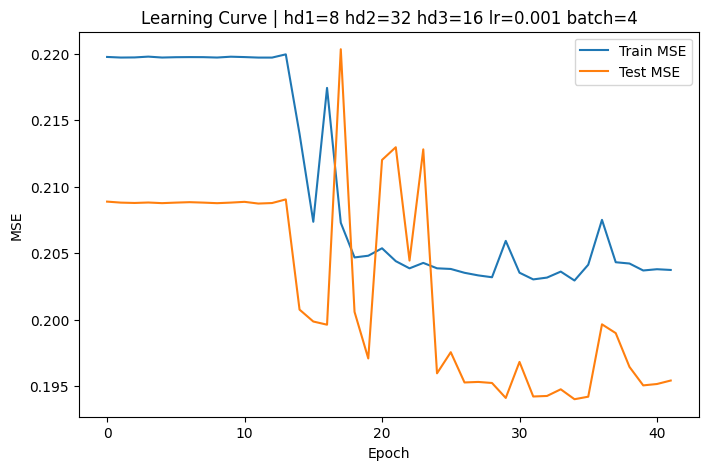


Deneme: hd1=8, hd2=32, hd3=16, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2095
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2118 | Test MSE: 0.2019
Epoch 10 | Train MSE: 0.2072 | Test MSE: 0.1990
Epoch 11 | Train MSE: 0.2066 | Test MSE: 0.2072
Epoch 12 | Train MSE: 0.2054 | Test MSE: 0.2130
Epoch 13 | Train MSE: 0.2047 | Test MSE: 0.2108
Epoch 14 | Train MSE: 0.2044 | Test MSE: 0.2228
Epoch 15 | Train MSE: 0.2058 | Test MSE: 0.2029
Epoch 16 | Train MSE: 0.2043 | Test MSE: 0.2098
Epoch 17 | Train MSE: 0.2086 | Test MSE: 0.1975
Epoch 18 | Train MSE: 0.2054 | Test MSE: 0.2318
Epoch 19 | Train MSE: 0.2035 | Test MSE: 0.2049
Epoch 20 | Train MSE: 0.2035 | Test MSE: 0

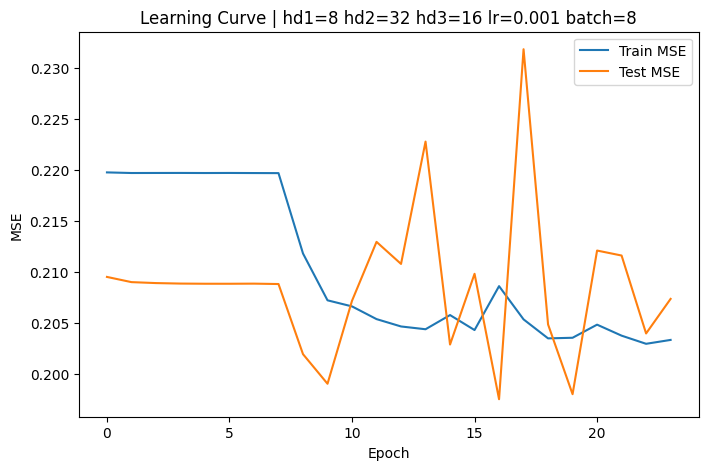


Deneme: hd1=8, hd2=32, hd3=16, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2199 | Test MSE: 0.2110
Epoch 2 | Train MSE: 0.2198 | Test MSE: 0.2102
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2098
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2097
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2097
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2095
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 14 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 15 | Train MSE: 0.2197 | Test MSE: 0.2095
Epoch 16 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 17 | Train MSE: 0.2197 | Test MSE: 0.2095
Epoch 18 | Train MSE: 0.2197 | Test MSE: 0.2095
Epoch 19 | Train MSE: 0.2197 | Test MSE: 0.2095
Epoch 20 | Train MSE: 0.2196 | Test MSE: 

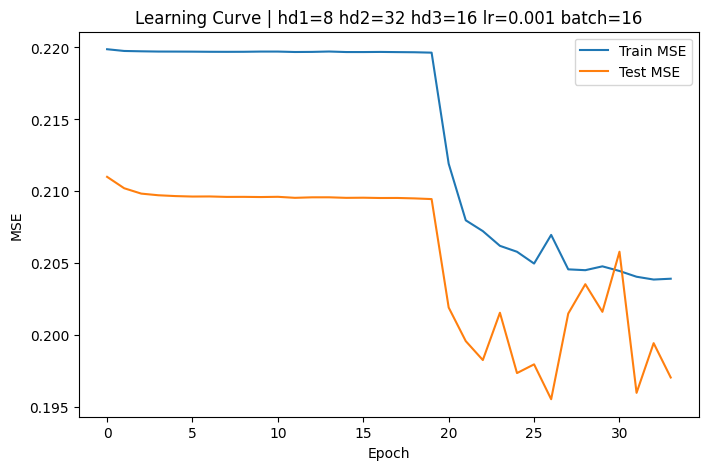


Deneme: hd1=8, hd2=32, hd3=32, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2126 | Test MSE: 0.2032
Epoch 2 | Train MSE: 0.2054 | Test MSE: 0.1958
Epoch 3 | Train MSE: 0.2040 | Test MSE: 0.1942
Epoch 4 | Train MSE: 0.2031 | Test MSE: 0.1964
Epoch 5 | Train MSE: 0.2031 | Test MSE: 0.1937
Epoch 6 | Train MSE: 0.2041 | Test MSE: 0.1944
Epoch 7 | Train MSE: 0.2039 | Test MSE: 0.1959
Epoch 8 | Train MSE: 0.2023 | Test MSE: 0.1943
Epoch 9 | Train MSE: 0.2032 | Test MSE: 0.1968
Epoch 10 | Train MSE: 0.2039 | Test MSE: 0.1968
Epoch 11 | Train MSE: 0.2019 | Test MSE: 0.1938
Epoch 12 | Train MSE: 0.2036 | Test MSE: 0.1959
Early stopping at epoch 12
Kombinasyon En iyi Test MSE: 0.1937


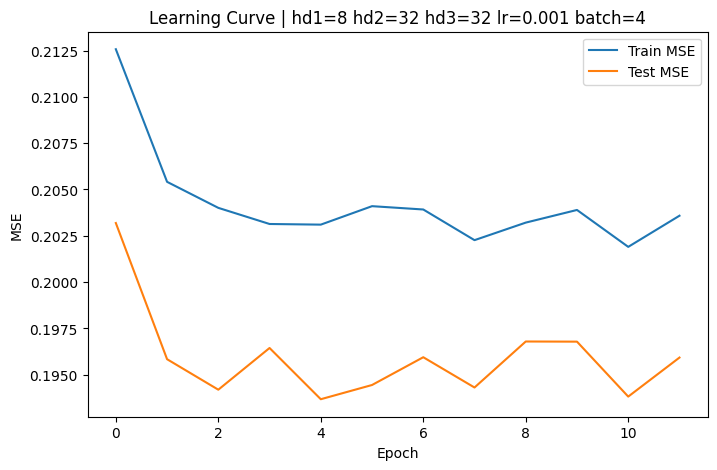


Deneme: hd1=8, hd2=32, hd3=32, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2100 | Test MSE: 0.2029
Epoch 2 | Train MSE: 0.2047 | Test MSE: 0.1962
Epoch 3 | Train MSE: 0.2040 | Test MSE: 0.1947
Epoch 4 | Train MSE: 0.2036 | Test MSE: 0.1966
Epoch 5 | Train MSE: 0.2034 | Test MSE: 0.1941
Epoch 6 | Train MSE: 0.2039 | Test MSE: 0.1941
Epoch 7 | Train MSE: 0.2039 | Test MSE: 0.1946
Epoch 8 | Train MSE: 0.2034 | Test MSE: 0.1950
Epoch 9 | Train MSE: 0.2030 | Test MSE: 0.1969
Epoch 10 | Train MSE: 0.2031 | Test MSE: 0.1943
Epoch 11 | Train MSE: 0.2027 | Test MSE: 0.1941
Epoch 12 | Train MSE: 0.2036 | Test MSE: 0.1953
Early stopping at epoch 12
Kombinasyon En iyi Test MSE: 0.1941


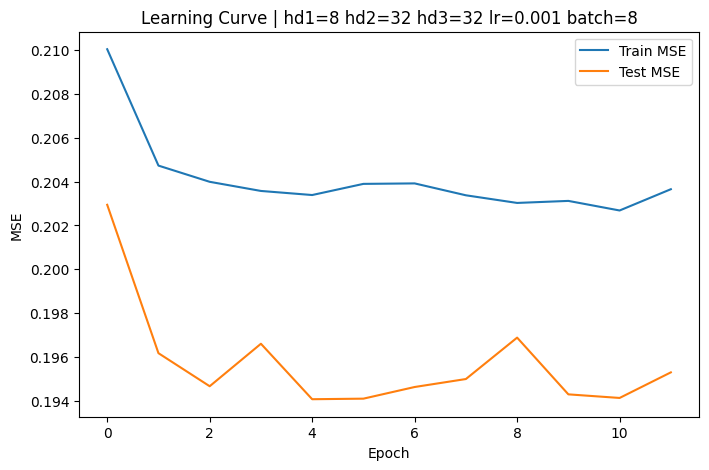


Deneme: hd1=8, hd2=32, hd3=32, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2102 | Test MSE: 0.2048
Epoch 2 | Train MSE: 0.2057 | Test MSE: 0.1982
Epoch 3 | Train MSE: 0.2047 | Test MSE: 0.1957
Epoch 4 | Train MSE: 0.2042 | Test MSE: 0.1968
Epoch 5 | Train MSE: 0.2040 | Test MSE: 0.1947
Epoch 6 | Train MSE: 0.2041 | Test MSE: 0.1946
Epoch 7 | Train MSE: 0.2045 | Test MSE: 0.1950
Epoch 8 | Train MSE: 0.2037 | Test MSE: 0.1957
Epoch 9 | Train MSE: 0.2036 | Test MSE: 0.1959
Epoch 10 | Train MSE: 0.2035 | Test MSE: 0.1950
Epoch 11 | Train MSE: 0.2034 | Test MSE: 0.1950
Epoch 12 | Train MSE: 0.2036 | Test MSE: 0.1937
Epoch 13 | Train MSE: 0.2032 | Test MSE: 0.1944
Epoch 14 | Train MSE: 0.2038 | Test MSE: 0.1950
Epoch 15 | Train MSE: 0.2032 | Test MSE: 0.1946
Epoch 16 | Train MSE: 0.2028 | Test MSE: 0.1935
Epoch 17 | Train MSE: 0.2028 | Test MSE: 0.1941
Epoch 18 | Train MSE: 0.2027 | Test MSE: 0.1933
Epoch 19 | Train MSE: 0.2028 | Test MSE: 0.1935
Epoch 20 | Train MSE: 0.2027 | Test MSE: 

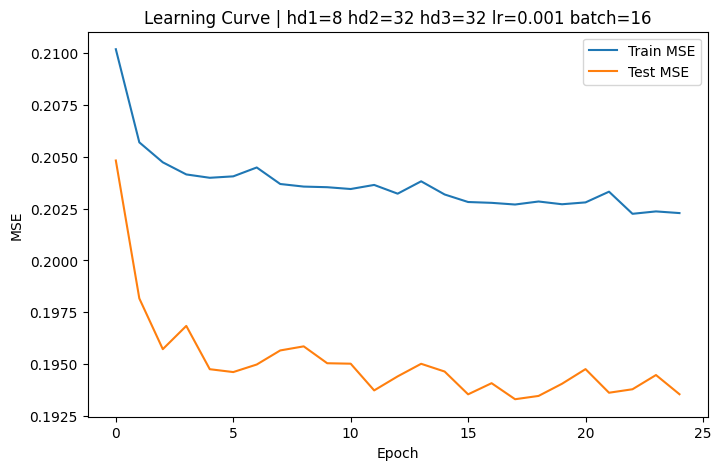


Deneme: hd1=16, hd2=8, hd3=8, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2200 | Test MSE: 0.2091
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 10 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 14 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 15 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 16 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 16
Kombinasyon En iyi Test MSE: 0.2087


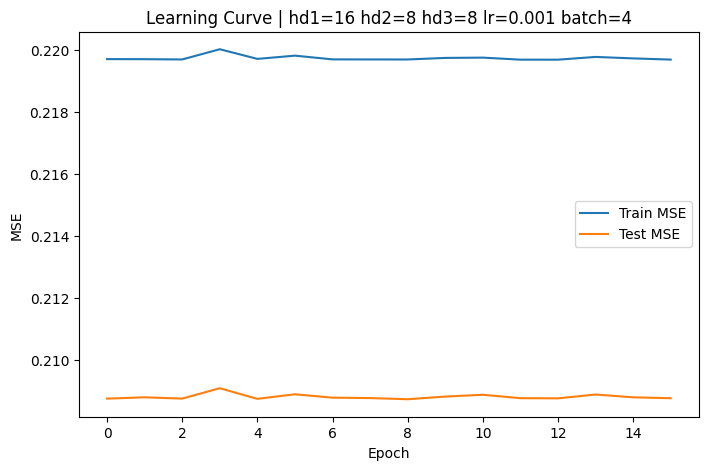


Deneme: hd1=16, hd2=8, hd3=8, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 12
Kombinasyon En iyi Test MSE: 0.2088


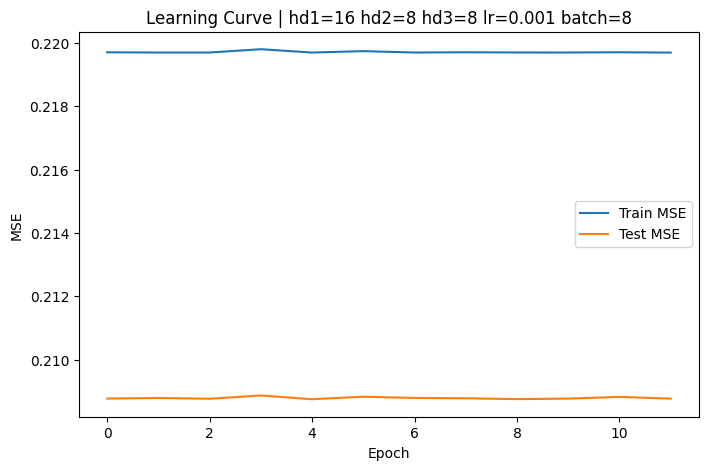


Deneme: hd1=16, hd2=8, hd3=8, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 14 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 15 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 16 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 16
Kombinasyon En iyi Test MSE: 0.2088


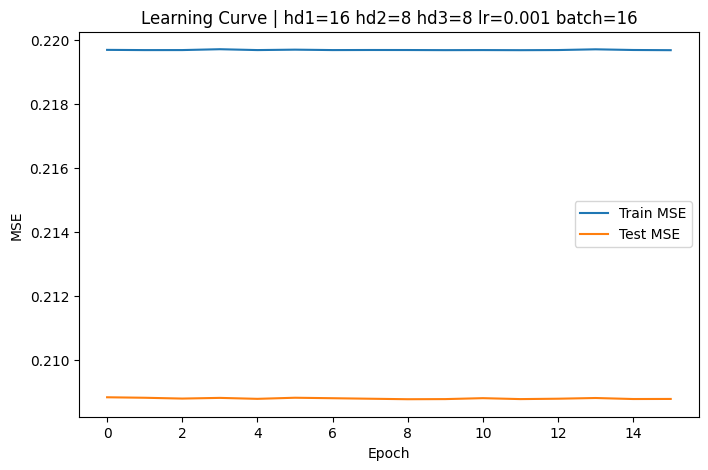


Deneme: hd1=16, hd2=8, hd3=16, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2199 | Test MSE: 0.2089
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 13 | Train MSE: 0.2093 | Test MSE: 0.1998
Epoch 14 | Train MSE: 0.2060 | Test MSE: 0.1962
Epoch 15 | Train MSE: 0.2057 | Test MSE: 0.1957
Epoch 16 | Train MSE: 0.2045 | Test MSE: 0.1951
Epoch 17 | Train MSE: 0.2123 | Test MSE: 0.1992
Epoch 18 | Train MSE: 0.2042 | Test MSE: 0.1951
Epoch 19 | Train MSE: 0.2037 | Test MSE: 0.1942
Epoch 20 | Train MSE: 0.2059 | Test MSE: 0

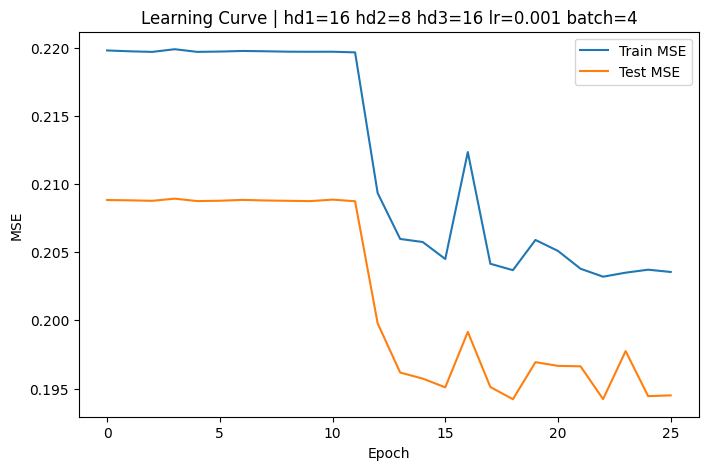


Deneme: hd1=16, hd2=8, hd3=16, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 14 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 15 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 16 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 17 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 18 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 19 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 20 | Train MSE: 0.2197 | Test MSE: 0

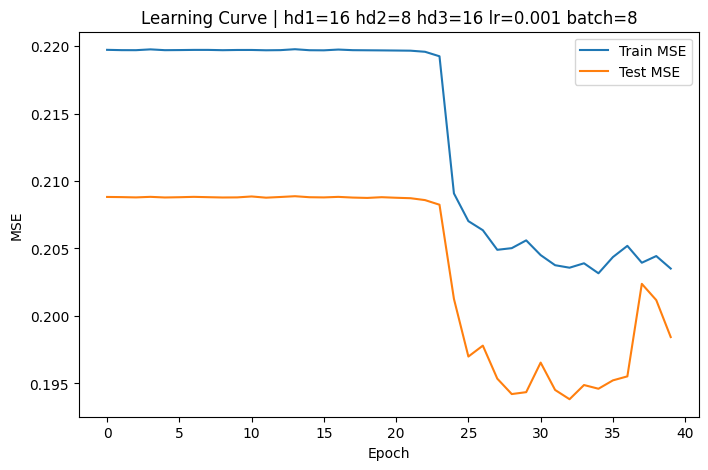


Deneme: hd1=16, hd2=8, hd3=16, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 14 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 15 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 16 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 17 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 18 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 19 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 20 | Train MSE: 0.2197 | Test MSE: 

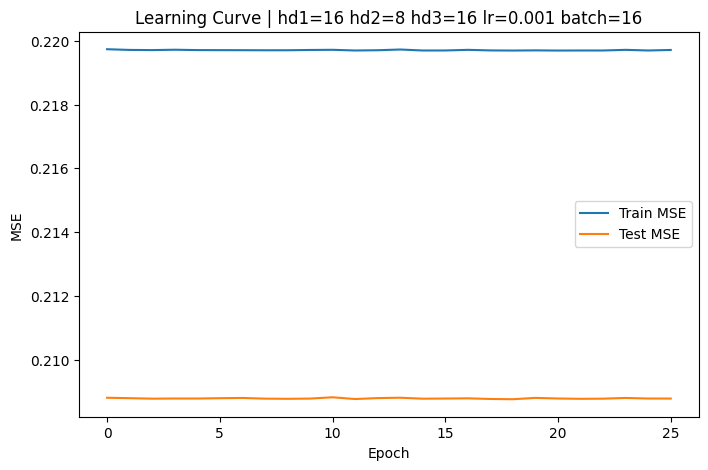


Deneme: hd1=16, hd2=8, hd3=32, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2123
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2121
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2120
Epoch 4 | Train MSE: 0.2199 | Test MSE: 0.2121
Epoch 5 | Train MSE: 0.2198 | Test MSE: 0.2120
Epoch 6 | Train MSE: 0.2198 | Test MSE: 0.2120
Epoch 7 | Train MSE: 0.2198 | Test MSE: 0.2121
Epoch 8 | Train MSE: 0.2199 | Test MSE: 0.2121
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2119
Epoch 10 | Train MSE: 0.2198 | Test MSE: 0.2119
Epoch 11 | Train MSE: 0.2198 | Test MSE: 0.2119
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2118
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2118
Epoch 14 | Train MSE: 0.2199 | Test MSE: 0.2121
Epoch 15 | Train MSE: 0.2197 | Test MSE: 0.2118
Epoch 16 | Train MSE: 0.2197 | Test MSE: 0.2118
Epoch 17 | Train MSE: 0.2197 | Test MSE: 0.2118
Epoch 18 | Train MSE: 0.2197 | Test MSE: 0.2118
Epoch 19 | Train MSE: 0.2198 | Test MSE: 0.2118
Epoch 20 | Train MSE: 0.2197 | Test MSE: 0

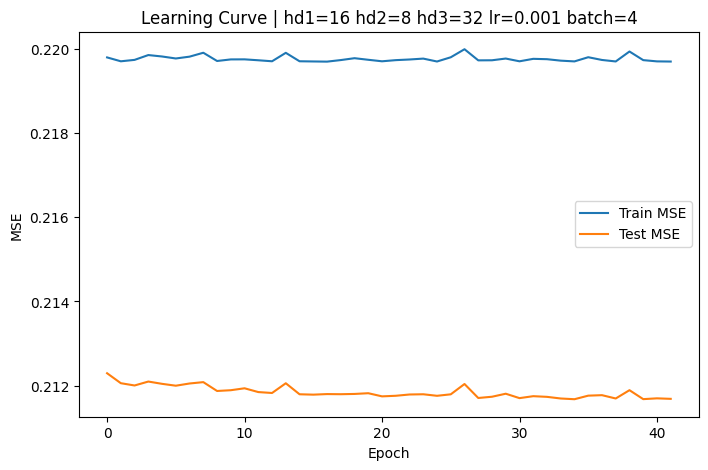


Deneme: hd1=16, hd2=8, hd3=32, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2194 | Test MSE: 0.2081
Epoch 2 | Train MSE: 0.2086 | Test MSE: 0.1985
Epoch 3 | Train MSE: 0.2065 | Test MSE: 0.2018
Epoch 4 | Train MSE: 0.2048 | Test MSE: 0.1956
Epoch 5 | Train MSE: 0.2056 | Test MSE: 0.1970
Epoch 6 | Train MSE: 0.2060 | Test MSE: 0.1973
Epoch 7 | Train MSE: 0.2038 | Test MSE: 0.1988
Epoch 8 | Train MSE: 0.2034 | Test MSE: 0.1989
Epoch 9 | Train MSE: 0.2035 | Test MSE: 0.1945
Epoch 10 | Train MSE: 0.2035 | Test MSE: 0.1942
Epoch 11 | Train MSE: 0.2041 | Test MSE: 0.1951
Epoch 12 | Train MSE: 0.2036 | Test MSE: 0.2036
Epoch 13 | Train MSE: 0.2032 | Test MSE: 0.2010
Epoch 14 | Train MSE: 0.2039 | Test MSE: 0.1972
Epoch 15 | Train MSE: 0.2030 | Test MSE: 0.2001
Epoch 16 | Train MSE: 0.2037 | Test MSE: 0.1965
Epoch 17 | Train MSE: 0.2033 | Test MSE: 0.1955
Early stopping at epoch 17
Kombinasyon En iyi Test MSE: 0.1942


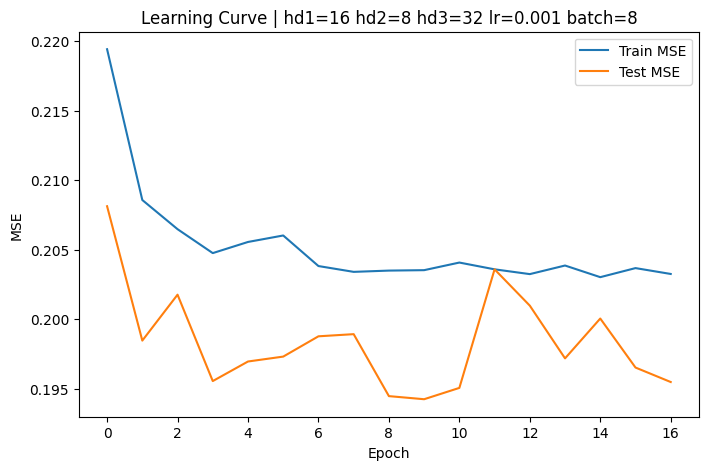


Deneme: hd1=16, hd2=8, hd3=32, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 10
Kombinasyon En iyi Test MSE: 0.2088


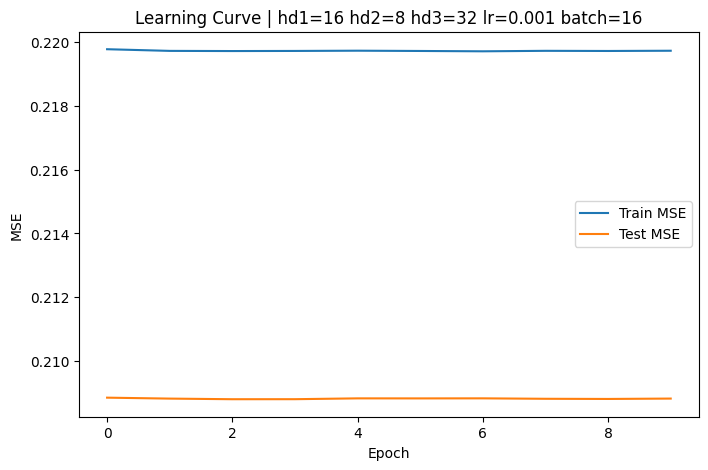


Deneme: hd1=16, hd2=16, hd3=8, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2199 | Test MSE: 0.2089
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 14 | Train MSE: 0.2199 | Test MSE: 0.2089
Epoch 15 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 16 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 17 | Train MSE: 0.2199 | Test MSE: 0.2089
Epoch 18 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 19 | Train MSE: 0.2197 | Test MSE: 0.2087
Early stopping at epoch 19
Kombinasyon En 

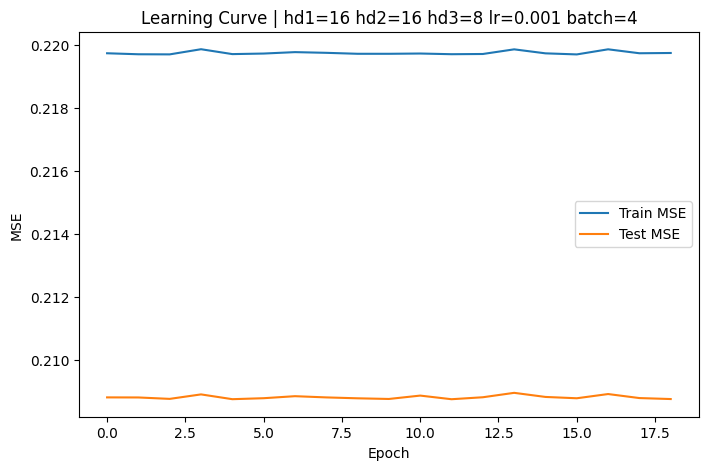


Deneme: hd1=16, hd2=16, hd3=8, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2196 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2165 | Test MSE: 0.2078
Epoch 11 | Train MSE: 0.2086 | Test MSE: 0.2003
Epoch 12 | Train MSE: 0.2063 | Test MSE: 0.1982
Epoch 13 | Train MSE: 0.2050 | Test MSE: 0.1968
Epoch 14 | Train MSE: 0.2043 | Test MSE: 0.1953
Epoch 15 | Train MSE: 0.2040 | Test MSE: 0.1958
Epoch 16 | Train MSE: 0.2038 | Test MSE: 0.1948
Epoch 17 | Train MSE: 0.2186 | Test MSE: 0.2105
Epoch 18 | Train MSE: 0.2042 | Test MSE: 0.1950
Epoch 19 | Train MSE: 0.2034 | Test MSE: 0.1942
Epoch 20 | Train MSE: 0.2043 | Test MSE: 0

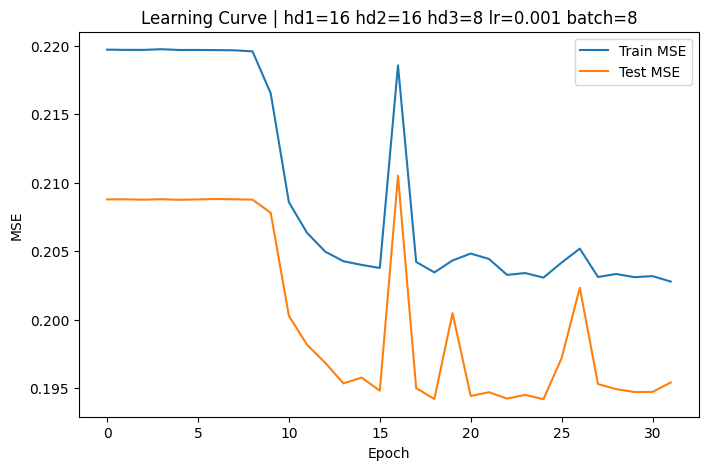


Deneme: hd1=16, hd2=16, hd3=8, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 10
Kombinasyon En iyi Test MSE: 0.2088


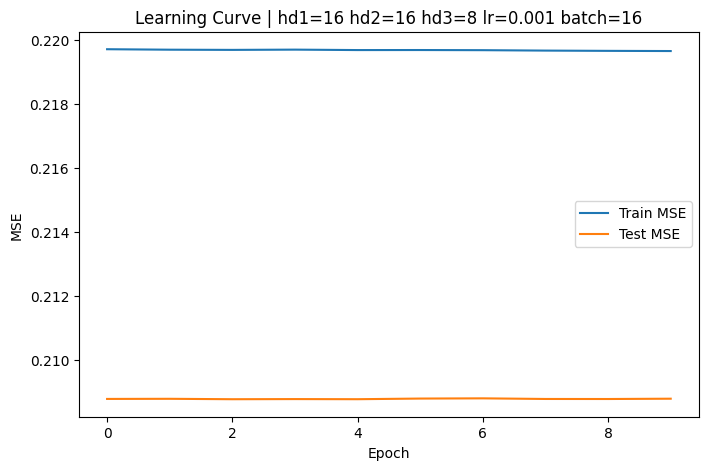


Deneme: hd1=16, hd2=16, hd3=16, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 2 | Train MSE: 0.2120 | Test MSE: 0.2035
Epoch 3 | Train MSE: 0.2057 | Test MSE: 0.1966
Epoch 4 | Train MSE: 0.2061 | Test MSE: 0.1963
Epoch 5 | Train MSE: 0.2035 | Test MSE: 0.1948
Epoch 6 | Train MSE: 0.2029 | Test MSE: 0.1953
Epoch 7 | Train MSE: 0.2030 | Test MSE: 0.1944
Epoch 8 | Train MSE: 0.2028 | Test MSE: 0.1957
Epoch 9 | Train MSE: 0.2028 | Test MSE: 0.1952
Epoch 10 | Train MSE: 0.2022 | Test MSE: 0.1933
Epoch 11 | Train MSE: 0.2022 | Test MSE: 0.1927
Epoch 12 | Train MSE: 0.2021 | Test MSE: 0.1926
Epoch 13 | Train MSE: 0.2028 | Test MSE: 0.1941
Epoch 14 | Train MSE: 0.2034 | Test MSE: 0.1950
Epoch 15 | Train MSE: 0.2021 | Test MSE: 0.1943
Epoch 16 | Train MSE: 0.2026 | Test MSE: 0.1936
Epoch 17 | Train MSE: 0.2027 | Test MSE: 0.1949
Epoch 18 | Train MSE: 0.2024 | Test MSE: 0.1970
Epoch 19 | Train MSE: 0.2022 | Test MSE: 0.1938
Early stopping at epoch 19
Kombinasyon En

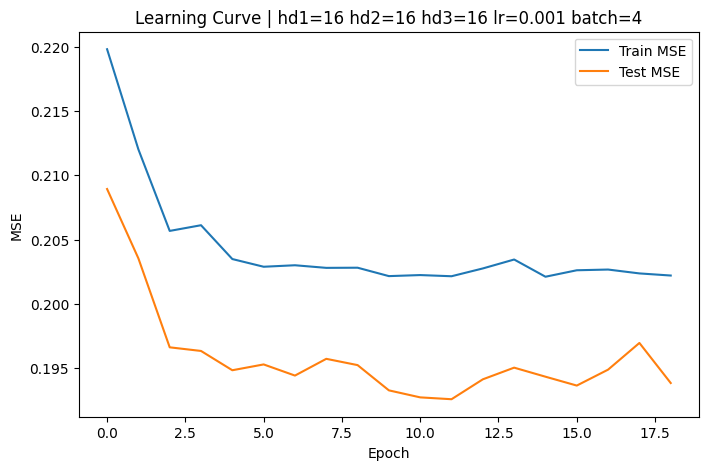


Deneme: hd1=16, hd2=16, hd3=16, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2090
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 5 | Train MSE: 0.2134 | Test MSE: 0.2038
Epoch 6 | Train MSE: 0.2098 | Test MSE: 0.2022
Epoch 7 | Train MSE: 0.2102 | Test MSE: 0.1990
Epoch 8 | Train MSE: 0.2076 | Test MSE: 0.2064
Epoch 9 | Train MSE: 0.2056 | Test MSE: 0.2009
Epoch 10 | Train MSE: 0.2047 | Test MSE: 0.1963
Epoch 11 | Train MSE: 0.2043 | Test MSE: 0.1986
Epoch 12 | Train MSE: 0.2048 | Test MSE: 0.2033
Epoch 13 | Train MSE: 0.2029 | Test MSE: 0.1978
Epoch 14 | Train MSE: 0.2045 | Test MSE: 0.1954
Epoch 15 | Train MSE: 0.2026 | Test MSE: 0.1980
Epoch 16 | Train MSE: 0.2024 | Test MSE: 0.1953
Epoch 17 | Train MSE: 0.2031 | Test MSE: 0.1945
Epoch 18 | Train MSE: 0.2022 | Test MSE: 0.1979
Epoch 19 | Train MSE: 0.2019 | Test MSE: 0.1963
Epoch 20 | Train MSE: 0.2022 | Test MSE: 

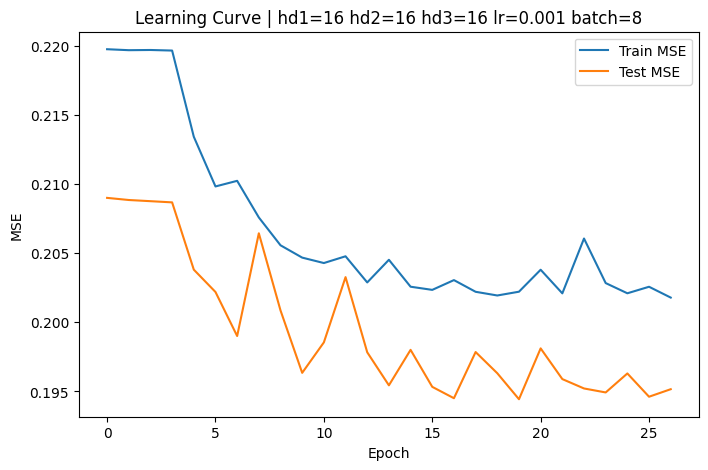


Deneme: hd1=16, hd2=16, hd3=16, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2199 | Test MSE: 0.2093
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 11 | Train MSE: 0.2186 | Test MSE: 0.2082
Epoch 12 | Train MSE: 0.2134 | Test MSE: 0.2026
Epoch 13 | Train MSE: 0.2104 | Test MSE: 0.2021
Epoch 14 | Train MSE: 0.2097 | Test MSE: 0.2021
Epoch 15 | Train MSE: 0.2081 | Test MSE: 0.2095
Epoch 16 | Train MSE: 0.2057 | Test MSE: 0.2007
Epoch 17 | Train MSE: 0.2052 | Test MSE: 0.1976
Epoch 18 | Train MSE: 0.2048 | Test MSE: 0.2008
Epoch 19 | Train MSE: 0.2043 | Test MSE: 0.1963
Epoch 20 | Train MSE: 0.2044 | Test MSE:

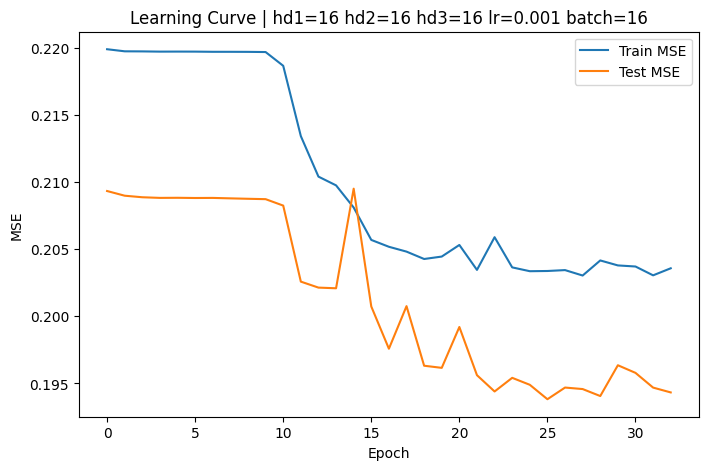


Deneme: hd1=16, hd2=16, hd3=32, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2092
Epoch 2 | Train MSE: 0.2200 | Test MSE: 0.2091
Epoch 3 | Train MSE: 0.2200 | Test MSE: 0.2090
Epoch 4 | Train MSE: 0.2198 | Test MSE: 0.2091
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 8 | Train MSE: 0.2199 | Test MSE: 0.2092
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 12 | Train MSE: 0.2198 | Test MSE: 0.2091
Early stopping at epoch 12
Kombinasyon En iyi Test MSE: 0.2090


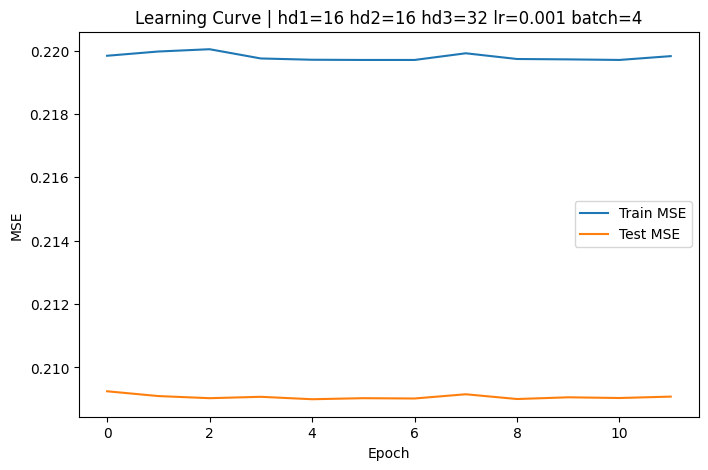


Deneme: hd1=16, hd2=16, hd3=32, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2105
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2098
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2097
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2095
Epoch 8 | Train MSE: 0.2198 | Test MSE: 0.2095
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2095
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2094
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2094
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2093
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2093
Epoch 14 | Train MSE: 0.2197 | Test MSE: 0.2092
Epoch 15 | Train MSE: 0.2196 | Test MSE: 0.2091
Epoch 16 | Train MSE: 0.2096 | Test MSE: 0.2072
Epoch 17 | Train MSE: 0.2068 | Test MSE: 0.1977
Epoch 18 | Train MSE: 0.2051 | Test MSE: 0.1995
Epoch 19 | Train MSE: 0.2043 | Test MSE: 0.1973
Epoch 20 | Train MSE: 0.2051 | Test MSE: 

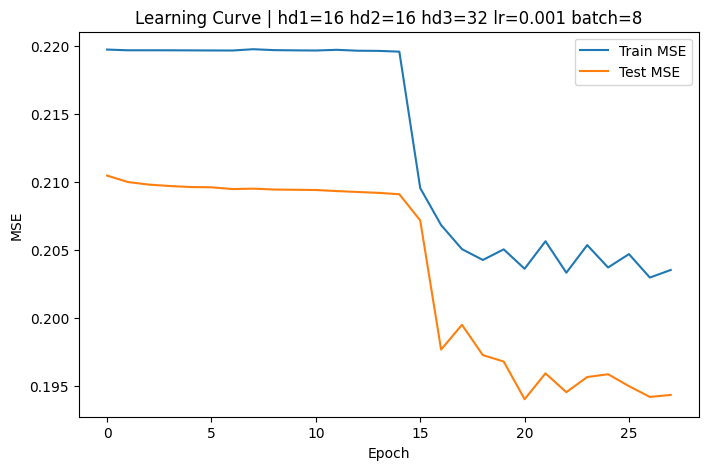


Deneme: hd1=16, hd2=16, hd3=32, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2199 | Test MSE: 0.2132
Epoch 2 | Train MSE: 0.2200 | Test MSE: 0.2118
Epoch 3 | Train MSE: 0.2200 | Test MSE: 0.2110
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2104
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2103
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2102
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2101
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2101
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2101
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2101
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2101
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2101
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2101
Epoch 14 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 15 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 16 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 17 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 18 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 19 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 20 | Train MSE: 0.2197 | Test MSE:

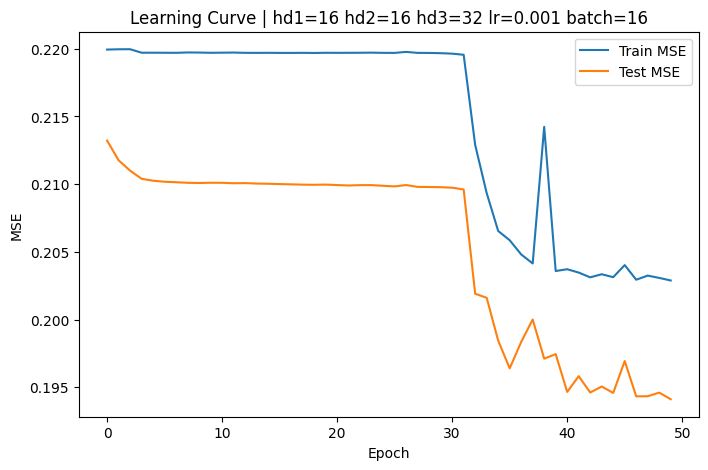


Deneme: hd1=16, hd2=32, hd3=8, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 14 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 15 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 16 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 17 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 18 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 8 | Train MSE: 0.2200 | Test MSE: 0.2090
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 19 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 20 | Train MSE: 0.2197 | Test MSE: 0

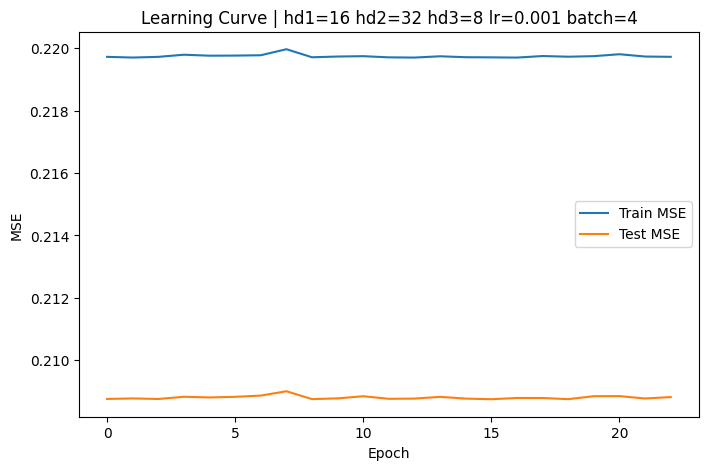


Deneme: hd1=16, hd2=32, hd3=8, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2198 | Test MSE: 0.2088
Early stopping at epoch 8
Kombinasyon En iyi Test MSE: 0.2088


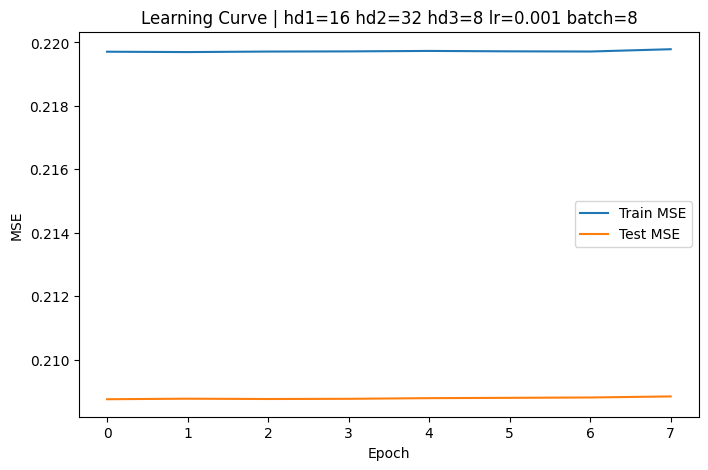


Deneme: hd1=16, hd2=32, hd3=8, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 8
Kombinasyon En iyi Test MSE: 0.2087


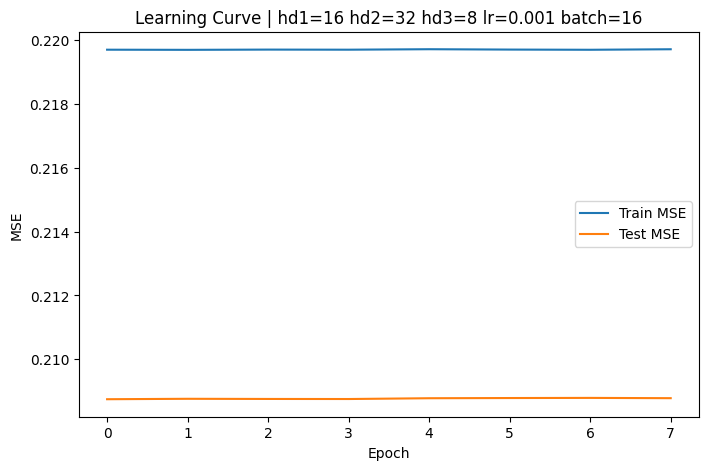


Deneme: hd1=16, hd2=32, hd3=16, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2194 | Test MSE: 0.2094
Epoch 2 | Train MSE: 0.2083 | Test MSE: 0.2046
Epoch 3 | Train MSE: 0.2057 | Test MSE: 0.1996
Epoch 4 | Train MSE: 0.2040 | Test MSE: 0.1969
Epoch 5 | Train MSE: 0.2036 | Test MSE: 0.1957
Epoch 6 | Train MSE: 0.2037 | Test MSE: 0.1978
Epoch 7 | Train MSE: 0.2027 | Test MSE: 0.1950
Epoch 8 | Train MSE: 0.2020 | Test MSE: 0.1937
Epoch 9 | Train MSE: 0.2022 | Test MSE: 0.1946
Epoch 10 | Train MSE: 0.2022 | Test MSE: 0.1954
Epoch 11 | Train MSE: 0.2022 | Test MSE: 0.1952
Epoch 12 | Train MSE: 0.2016 | Test MSE: 0.1940
Epoch 13 | Train MSE: 0.2018 | Test MSE: 0.1946
Epoch 14 | Train MSE: 0.2015 | Test MSE: 0.1960
Epoch 15 | Train MSE: 0.2013 | Test MSE: 0.1955
Early stopping at epoch 15
Kombinasyon En iyi Test MSE: 0.1937


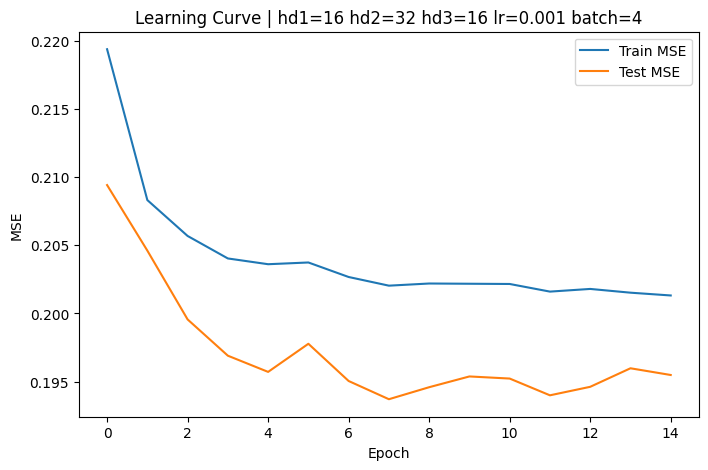


Deneme: hd1=16, hd2=32, hd3=16, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2103
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2095
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2093
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2092
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2092
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2092
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2092
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2092
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2092
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2092
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2092
Epoch 14 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 15 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 16 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 17 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 18 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 19 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 20 | Train MSE: 0.2197 | Test MSE: 

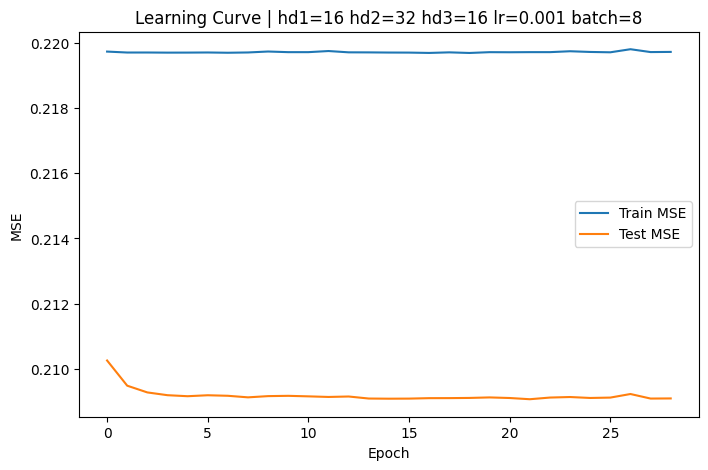


Deneme: hd1=16, hd2=32, hd3=16, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2164
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2120
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2108
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2103
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2101
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2099
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2098
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2097
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2097
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2095
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2094
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2095
Epoch 14 | Train MSE: 0.2197 | Test MSE: 0.2094
Epoch 15 | Train MSE: 0.2197 | Test MSE: 0.2094
Epoch 16 | Train MSE: 0.2197 | Test MSE: 0.2095
Epoch 17 | Train MSE: 0.2197 | Test MSE: 0.2094
Epoch 18 | Train MSE: 0.2197 | Test MSE: 0.2094
Epoch 19 | Train MSE: 0.2197 | Test MSE: 0.2094
Epoch 20 | Train MSE: 0.2197 | Test MSE:

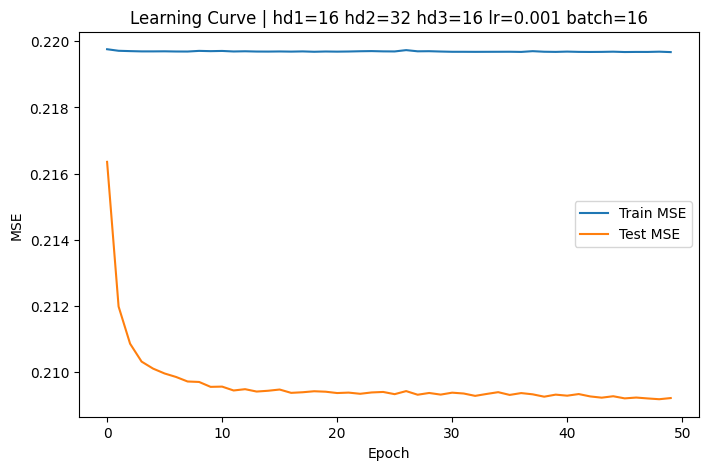


Deneme: hd1=16, hd2=32, hd3=32, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2044 | Test MSE: 0.1970
Epoch 2 | Train MSE: 0.2036 | Test MSE: 0.1954
Epoch 3 | Train MSE: 0.2105 | Test MSE: 0.2087
Epoch 4 | Train MSE: 0.2027 | Test MSE: 0.1955
Epoch 5 | Train MSE: 0.2023 | Test MSE: 0.1975
Epoch 6 | Train MSE: 0.2018 | Test MSE: 0.2007
Epoch 7 | Train MSE: 0.2019 | Test MSE: 0.1996
Epoch 8 | Train MSE: 0.2024 | Test MSE: 0.2045
Epoch 9 | Train MSE: 0.2015 | Test MSE: 0.1987
Early stopping at epoch 9
Kombinasyon En iyi Test MSE: 0.1954


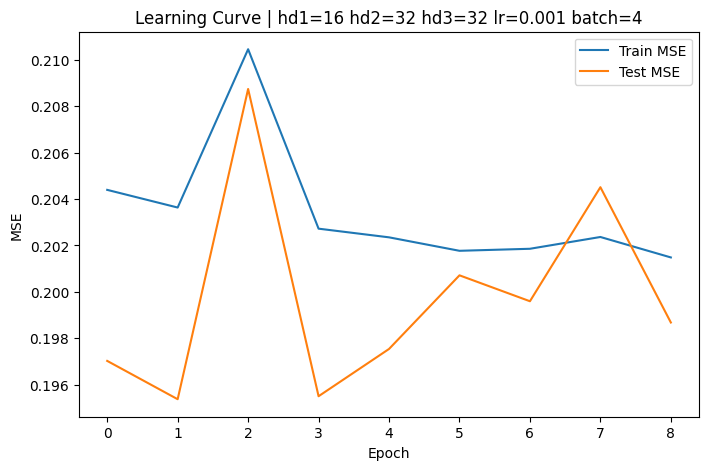


Deneme: hd1=16, hd2=32, hd3=32, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2120
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2112
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2110
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2109
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2109
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2109
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2109
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2109
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2109
Epoch 10 | Train MSE: 0.2198 | Test MSE: 0.2109
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2110
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2109
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2109
Epoch 14 | Train MSE: 0.2197 | Test MSE: 0.2109
Epoch 15 | Train MSE: 0.2197 | Test MSE: 0.2109
Early stopping at epoch 15
Kombinasyon En iyi Test MSE: 0.2109


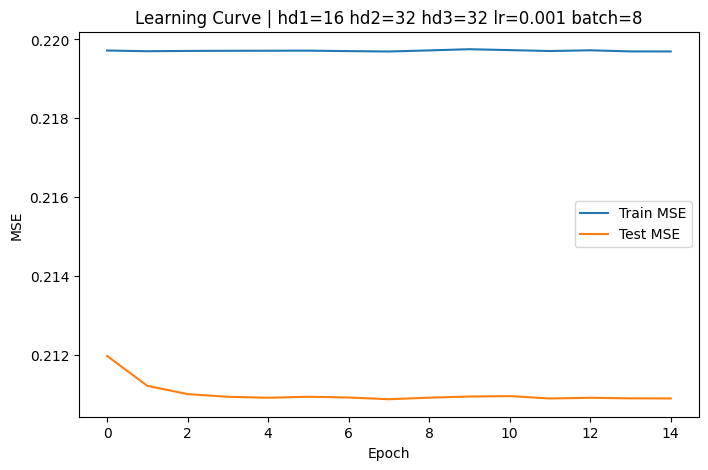


Deneme: hd1=16, hd2=32, hd3=32, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2062 | Test MSE: 0.2165
Epoch 2 | Train MSE: 0.2047 | Test MSE: 0.2229
Epoch 3 | Train MSE: 0.2076 | Test MSE: 0.2313
Epoch 4 | Train MSE: 0.2038 | Test MSE: 0.2184
Epoch 5 | Train MSE: 0.2035 | Test MSE: 0.2114
Epoch 6 | Train MSE: 0.2031 | Test MSE: 0.2165
Epoch 7 | Train MSE: 0.2030 | Test MSE: 0.2115
Epoch 8 | Train MSE: 0.2033 | Test MSE: 0.2087
Epoch 9 | Train MSE: 0.2028 | Test MSE: 0.2078
Epoch 10 | Train MSE: 0.2025 | Test MSE: 0.2333
Epoch 11 | Train MSE: 0.2024 | Test MSE: 0.2076
Epoch 12 | Train MSE: 0.2027 | Test MSE: 0.2102
Epoch 13 | Train MSE: 0.2022 | Test MSE: 0.2206
Epoch 14 | Train MSE: 0.2019 | Test MSE: 0.2234
Epoch 15 | Train MSE: 0.2020 | Test MSE: 0.2216
Epoch 16 | Train MSE: 0.2016 | Test MSE: 0.2243
Epoch 17 | Train MSE: 0.2020 | Test MSE: 0.2138
Epoch 18 | Train MSE: 0.2015 | Test MSE: 0.2222
Early stopping at epoch 18
Kombinasyon En iyi Test MSE: 0.2076


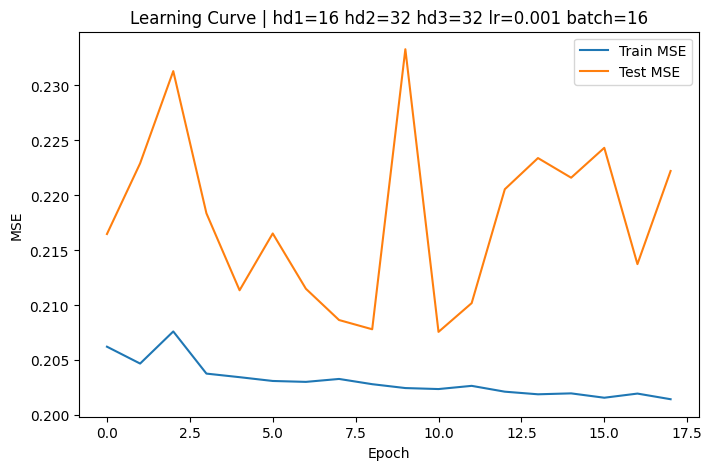


Deneme: hd1=32, hd2=8, hd3=8, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2199 | Test MSE: 0.2092
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 8 | Train MSE: 0.2199 | Test MSE: 0.2091
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 12 | Train MSE: 0.2198 | Test MSE: 0.2091
Early stopping at epoch 12
Kombinasyon En iyi Test MSE: 0.2089


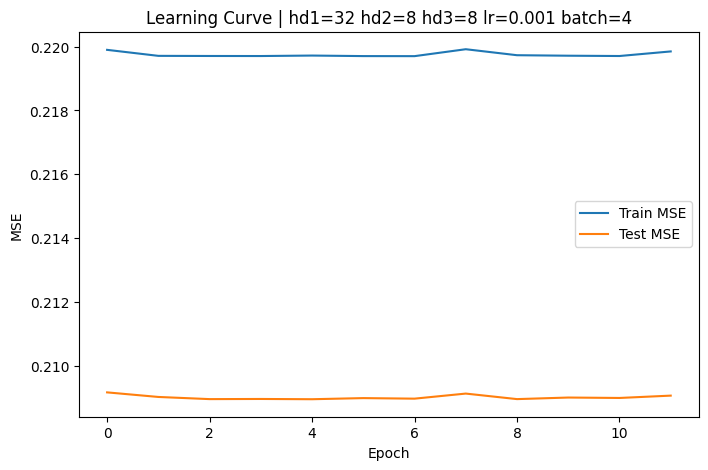


Deneme: hd1=32, hd2=8, hd3=8, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2107
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2104
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2101
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2099
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2098
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2098
Epoch 7 | Train MSE: 0.2196 | Test MSE: 0.2097
Epoch 8 | Train MSE: 0.2094 | Test MSE: 0.2035
Epoch 9 | Train MSE: 0.2063 | Test MSE: 0.1974
Epoch 10 | Train MSE: 0.2066 | Test MSE: 0.2034
Epoch 11 | Train MSE: 0.2044 | Test MSE: 0.2000
Epoch 12 | Train MSE: 0.2046 | Test MSE: 0.1954
Epoch 13 | Train MSE: 0.2048 | Test MSE: 0.1970
Epoch 14 | Train MSE: 0.2035 | Test MSE: 0.1975
Epoch 15 | Train MSE: 0.2034 | Test MSE: 0.1991
Epoch 16 | Train MSE: 0.2035 | Test MSE: 0.1984
Epoch 17 | Train MSE: 0.2031 | Test MSE: 0.1959
Epoch 18 | Train MSE: 0.2033 | Test MSE: 0.2026
Epoch 19 | Train MSE: 0.2029 | Test MSE: 0.1969
Early stopping at epoch 19
Kombinasyon En i

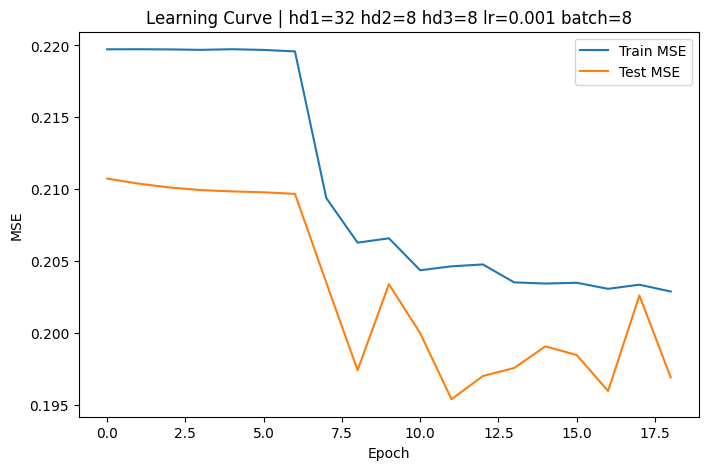


Deneme: hd1=32, hd2=8, hd3=8, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2098
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2094
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2093
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2092
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2092
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2092
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2092
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 14 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 15 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 16 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 17 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 18 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 19 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 20 | Train MSE: 0.2197 | Test MSE: 0

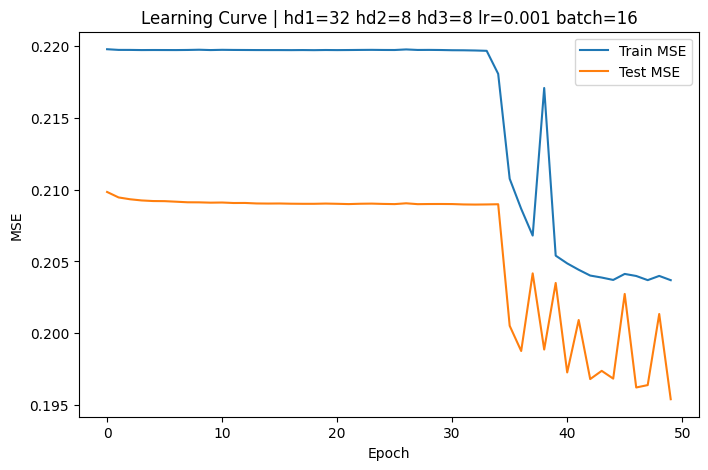


Deneme: hd1=32, hd2=8, hd3=16, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 7 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 10
Kombinasyon En iyi Test MSE: 0.2088


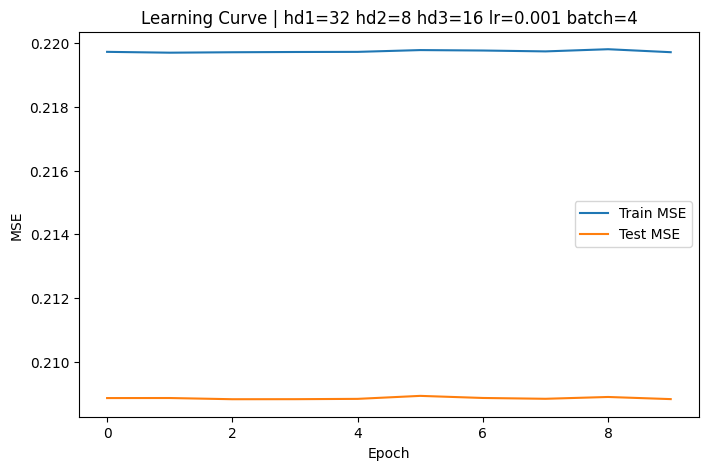


Deneme: hd1=32, hd2=8, hd3=16, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2097
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 9 | Train MSE: 0.2198 | Test MSE: 0.2096
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2096
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2096
Early stopping at epoch 11
Kombinasyon En iyi Test MSE: 0.2096


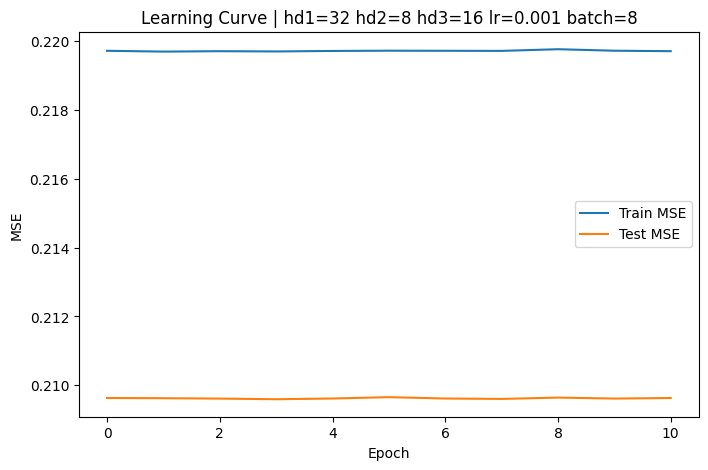


Deneme: hd1=32, hd2=8, hd3=16, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2101
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2099
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 14 | Train MSE: 0.2197 | Test MSE: 0.2100
Epoch 15 | Train MSE: 0.2197 | Test MSE: 0.2099
Epoch 16 | Train MSE: 0.2197 | Test MSE: 0.2099
Epoch 17 | Train MSE: 0.2197 | Test MSE: 0.2099
Epoch 18 | Train MSE: 0.2197 | Test MSE: 0.2099
Epoch 19 | Train MSE: 0.2197 | Test MSE: 0.2099
Epoch 20 | Train MSE: 0.2197 | Test MSE: 

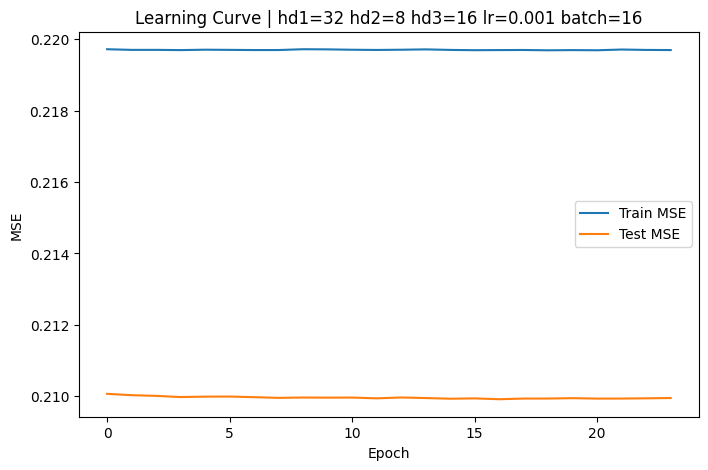


Deneme: hd1=32, hd2=8, hd3=32, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2104 | Test MSE: 0.2154
Epoch 10 | Train MSE: 0.2055 | Test MSE: 0.2040
Epoch 11 | Train MSE: 0.2048 | Test MSE: 0.2049
Epoch 12 | Train MSE: 0.2043 | Test MSE: 0.2011
Epoch 13 | Train MSE: 0.2055 | Test MSE: 0.2047
Epoch 14 | Train MSE: 0.2035 | Test MSE: 0.2017
Epoch 15 | Train MSE: 0.2036 | Test MSE: 0.2012
Epoch 16 | Train MSE: 0.2056 | Test MSE: 0.1963
Epoch 17 | Train MSE: 0.2037 | Test MSE: 0.1980
Epoch 18 | Train MSE: 0.2045 | Test MSE: 0.2103
Epoch 19 | Train MSE: 0.2043 | Test MSE: 0.1972
Epoch 20 | Train MSE: 0.2044 | Test MSE: 0

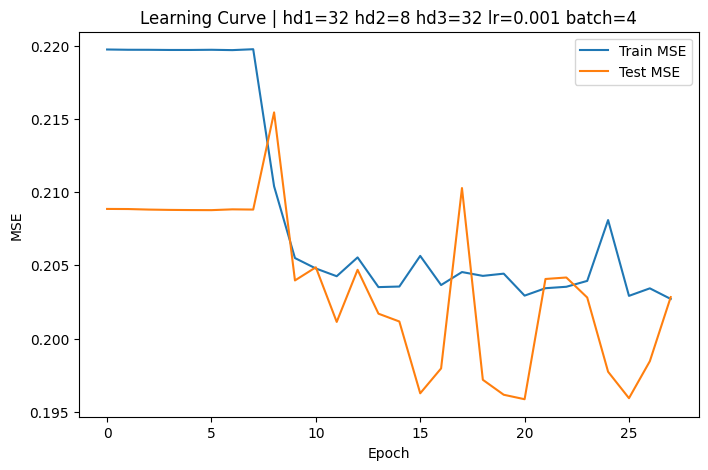


Deneme: hd1=32, hd2=8, hd3=32, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 12 | Train MSE: 0.2198 | Test MSE: 0.2089
Early stopping at epoch 12
Kombinasyon En iyi Test MSE: 0.2088


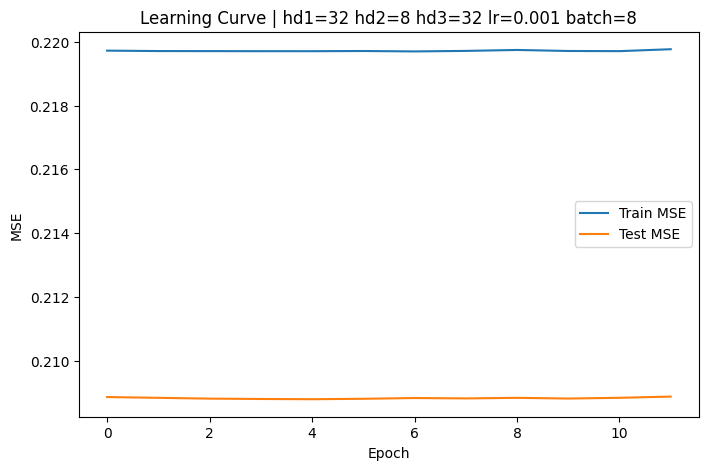


Deneme: hd1=32, hd2=8, hd3=32, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 11
Kombinasyon En iyi Test MSE: 0.2088


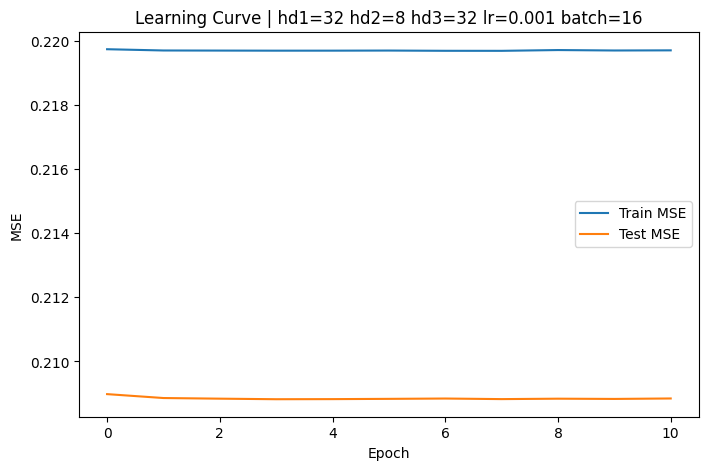


Deneme: hd1=32, hd2=16, hd3=8, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 12 | Train MSE: 0.2198 | Test MSE: 0.2089
Early stopping at epoch 12
Kombinasyon En iyi Test MSE: 0.2088


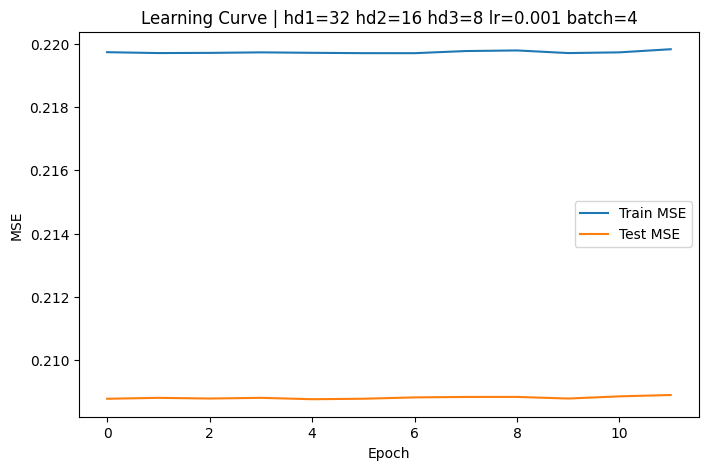


Deneme: hd1=32, hd2=16, hd3=8, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2093
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2091
Early stopping at epoch 8
Kombinasyon En iyi Test MSE: 0.2089


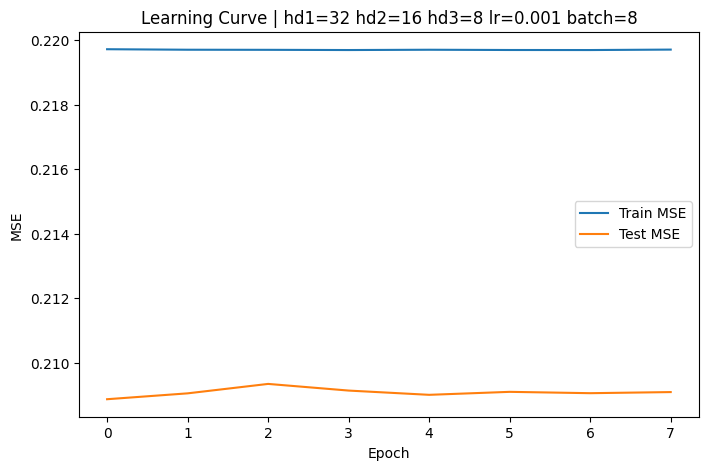


Deneme: hd1=32, hd2=16, hd3=8, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 8
Kombinasyon En iyi Test MSE: 0.2088


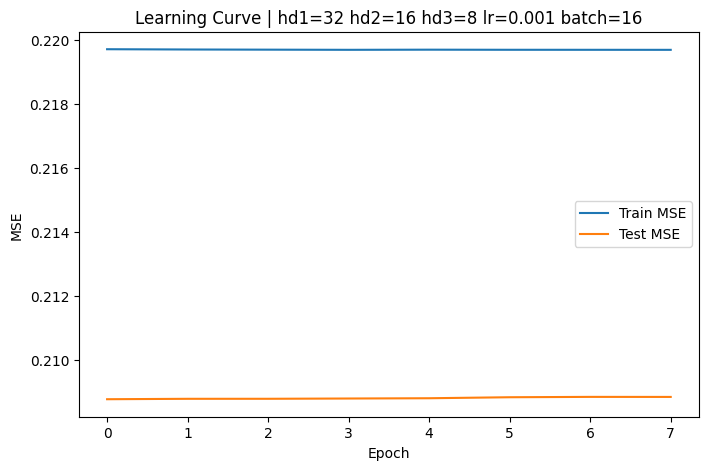


Deneme: hd1=32, hd2=16, hd3=16, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2051 | Test MSE: 0.1957
Epoch 2 | Train MSE: 0.2048 | Test MSE: 0.1958
Epoch 3 | Train MSE: 0.2044 | Test MSE: 0.1955
Epoch 4 | Train MSE: 0.2046 | Test MSE: 0.1958
Epoch 5 | Train MSE: 0.2035 | Test MSE: 0.1955
Epoch 6 | Train MSE: 0.2035 | Test MSE: 0.1954
Epoch 7 | Train MSE: 0.2049 | Test MSE: 0.1966
Epoch 8 | Train MSE: 0.2044 | Test MSE: 0.2000
Epoch 9 | Train MSE: 0.2034 | Test MSE: 0.1954
Epoch 10 | Train MSE: 0.2032 | Test MSE: 0.1975
Epoch 11 | Train MSE: 0.2032 | Test MSE: 0.1956
Epoch 12 | Train MSE: 0.2044 | Test MSE: 0.2044
Epoch 13 | Train MSE: 0.2042 | Test MSE: 0.1952
Epoch 14 | Train MSE: 0.2028 | Test MSE: 0.1952
Epoch 15 | Train MSE: 0.2038 | Test MSE: 0.1945
Epoch 16 | Train MSE: 0.2045 | Test MSE: 0.2012
Epoch 17 | Train MSE: 0.2033 | Test MSE: 0.1946
Epoch 18 | Train MSE: 0.2030 | Test MSE: 0.1971
Epoch 19 | Train MSE: 0.2027 | Test MSE: 0.1946
Epoch 20 | Train MSE: 0.2030 | Test MSE: 

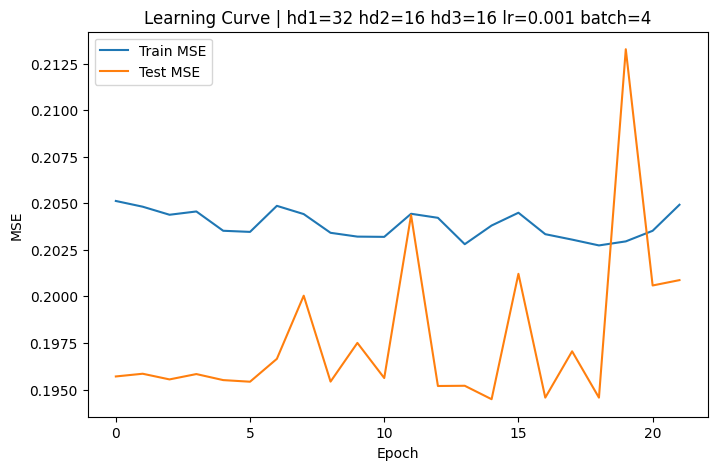


Deneme: hd1=32, hd2=16, hd3=16, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2089
Early stopping at epoch 12
Kombinasyon En iyi Test MSE: 0.2089


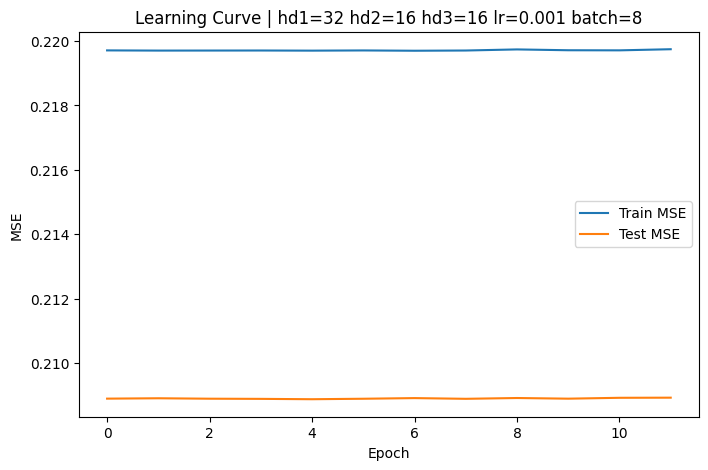


Deneme: hd1=32, hd2=16, hd3=16, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2093
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 4 | Train MSE: 0.2196 | Test MSE: 0.2090
Epoch 5 | Train MSE: 0.2116 | Test MSE: 0.2005
Epoch 6 | Train MSE: 0.2086 | Test MSE: 0.1989
Epoch 7 | Train MSE: 0.2065 | Test MSE: 0.1986
Epoch 8 | Train MSE: 0.2075 | Test MSE: 0.1971
Epoch 9 | Train MSE: 0.2052 | Test MSE: 0.1960
Epoch 10 | Train MSE: 0.2046 | Test MSE: 0.1951
Epoch 11 | Train MSE: 0.2043 | Test MSE: 0.1958
Epoch 12 | Train MSE: 0.2042 | Test MSE: 0.1949
Epoch 13 | Train MSE: 0.2041 | Test MSE: 0.1959
Epoch 14 | Train MSE: 0.2037 | Test MSE: 0.1948
Epoch 15 | Train MSE: 0.2039 | Test MSE: 0.1962
Epoch 16 | Train MSE: 0.2062 | Test MSE: 0.1958
Epoch 17 | Train MSE: 0.2034 | Test MSE: 0.1952
Epoch 18 | Train MSE: 0.2042 | Test MSE: 0.1968
Epoch 19 | Train MSE: 0.2039 | Test MSE: 0.1950
Epoch 20 | Train MSE: 0.2035 | Test MSE:

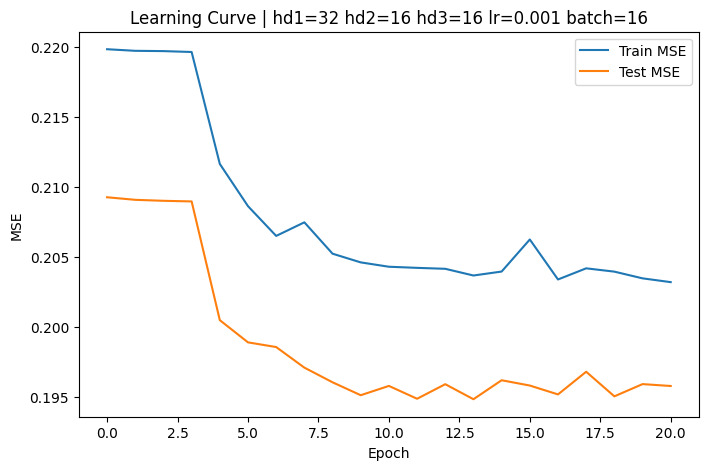


Deneme: hd1=32, hd2=16, hd3=32, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2079 | Test MSE: 0.2011
Epoch 4 | Train MSE: 0.2054 | Test MSE: 0.1985
Epoch 5 | Train MSE: 0.2057 | Test MSE: 0.1960
Epoch 6 | Train MSE: 0.2058 | Test MSE: 0.1963
Epoch 7 | Train MSE: 0.2041 | Test MSE: 0.1962
Epoch 8 | Train MSE: 0.2041 | Test MSE: 0.1951
Epoch 9 | Train MSE: 0.2041 | Test MSE: 0.1956
Epoch 10 | Train MSE: 0.2048 | Test MSE: 0.1960
Epoch 11 | Train MSE: 0.2052 | Test MSE: 0.1992
Epoch 12 | Train MSE: 0.2050 | Test MSE: 0.2106
Epoch 13 | Train MSE: 0.2035 | Test MSE: 0.1952
Epoch 14 | Train MSE: 0.2033 | Test MSE: 0.1969
Epoch 15 | Train MSE: 0.2040 | Test MSE: 0.1949
Epoch 16 | Train MSE: 0.2025 | Test MSE: 0.1943
Epoch 17 | Train MSE: 0.2028 | Test MSE: 0.1953
Epoch 18 | Train MSE: 0.2029 | Test MSE: 0.1935
Epoch 19 | Train MSE: 0.2029 | Test MSE: 0.1958
Epoch 20 | Train MSE: 0.2027 | Test MSE: 

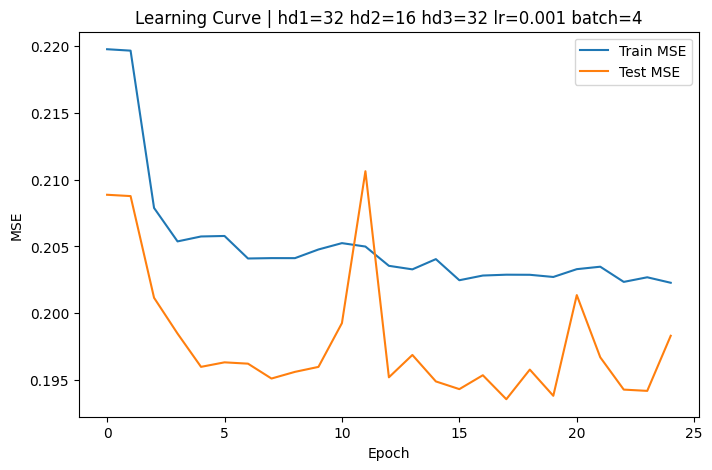


Deneme: hd1=32, hd2=16, hd3=32, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2199 | Test MSE: 0.2090
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2095 | Test MSE: 0.1986
Epoch 5 | Train MSE: 0.2058 | Test MSE: 0.1960
Epoch 6 | Train MSE: 0.2058 | Test MSE: 0.1964
Epoch 7 | Train MSE: 0.2042 | Test MSE: 0.1967
Epoch 8 | Train MSE: 0.2044 | Test MSE: 0.1954
Epoch 9 | Train MSE: 0.2042 | Test MSE: 0.1946
Epoch 10 | Train MSE: 0.2039 | Test MSE: 0.1945
Epoch 11 | Train MSE: 0.2042 | Test MSE: 0.1950
Epoch 12 | Train MSE: 0.2045 | Test MSE: 0.1955
Epoch 13 | Train MSE: 0.2037 | Test MSE: 0.1949
Epoch 14 | Train MSE: 0.2036 | Test MSE: 0.1952
Epoch 15 | Train MSE: 0.2043 | Test MSE: 0.1943
Epoch 16 | Train MSE: 0.2039 | Test MSE: 0.1943
Epoch 17 | Train MSE: 0.2031 | Test MSE: 0.1953
Epoch 18 | Train MSE: 0.2030 | Test MSE: 0.1976
Epoch 19 | Train MSE: 0.2031 | Test MSE: 0.1958
Epoch 20 | Train MSE: 0.2033 | Test MSE: 

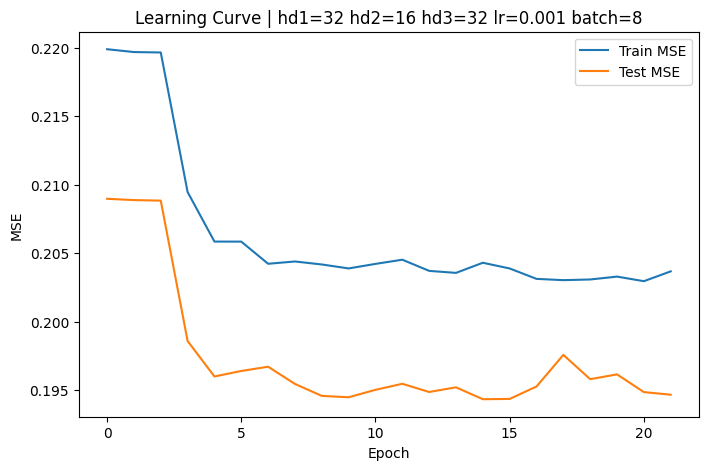


Deneme: hd1=32, hd2=16, hd3=32, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2201 | Test MSE: 0.2094
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2091
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2090
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2089
Epoch 6 | Train MSE: 0.2192 | Test MSE: 0.2086
Epoch 7 | Train MSE: 0.2083 | Test MSE: 0.1983
Epoch 8 | Train MSE: 0.2059 | Test MSE: 0.1969
Epoch 9 | Train MSE: 0.2057 | Test MSE: 0.1991
Epoch 10 | Train MSE: 0.2046 | Test MSE: 0.1958
Epoch 11 | Train MSE: 0.2044 | Test MSE: 0.1952
Epoch 12 | Train MSE: 0.2066 | Test MSE: 0.1964
Epoch 13 | Train MSE: 0.2041 | Test MSE: 0.1950
Epoch 14 | Train MSE: 0.2039 | Test MSE: 0.1943
Epoch 15 | Train MSE: 0.2049 | Test MSE: 0.1945
Epoch 16 | Train MSE: 0.2036 | Test MSE: 0.1944
Epoch 17 | Train MSE: 0.2036 | Test MSE: 0.1942
Epoch 18 | Train MSE: 0.2034 | Test MSE: 0.1946
Epoch 19 | Train MSE: 0.2042 | Test MSE: 0.1950
Epoch 20 | Train MSE: 0.2039 | Test MSE:

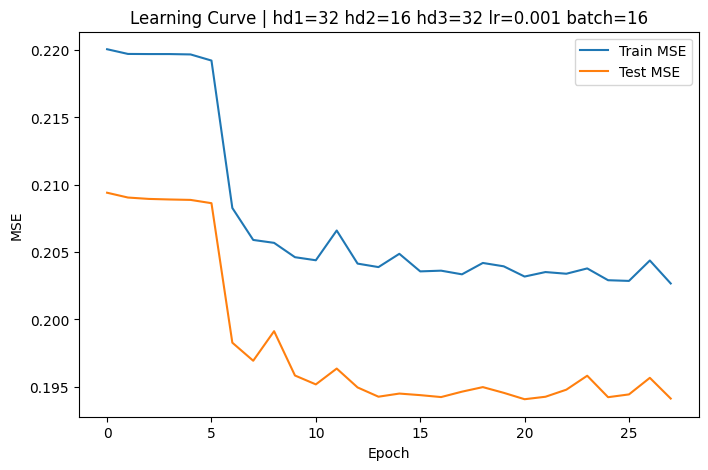


Deneme: hd1=32, hd2=32, hd3=8, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2089
Early stopping at epoch 11
Kombinasyon En iyi Test MSE: 0.2087


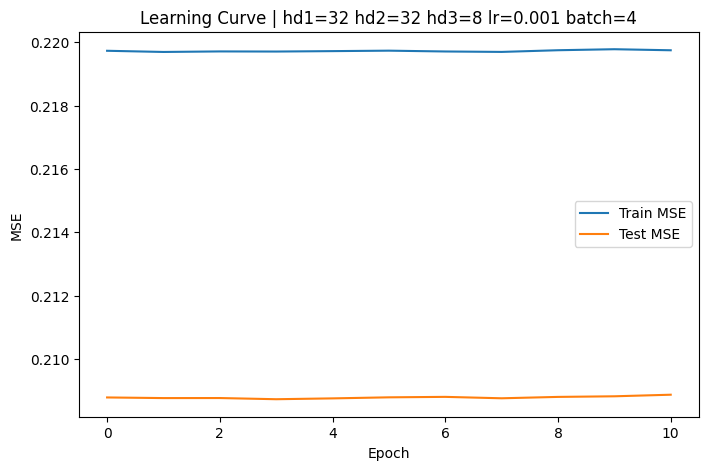


Deneme: hd1=32, hd2=32, hd3=8, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 11
Kombinasyon En iyi Test MSE: 0.2087


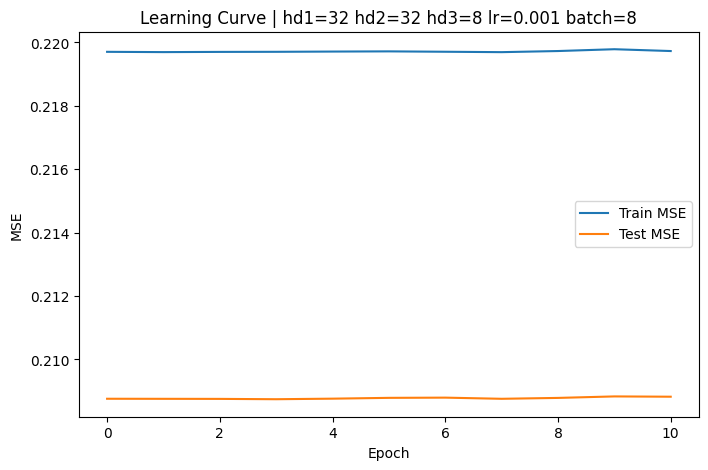


Deneme: hd1=32, hd2=32, hd3=8, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 11
Kombinasyon En iyi Test MSE: 0.2088


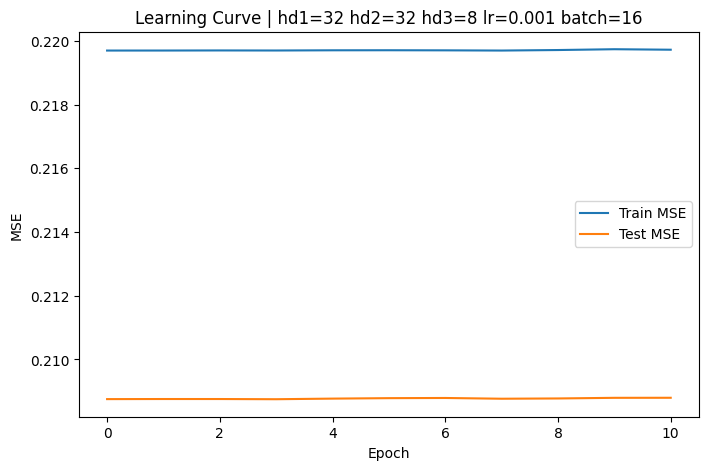


Deneme: hd1=32, hd2=32, hd3=16, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 9 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2198 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 12 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 13 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 14 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 15 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 15
Kombinasyon En iyi Test MSE: 0.2087


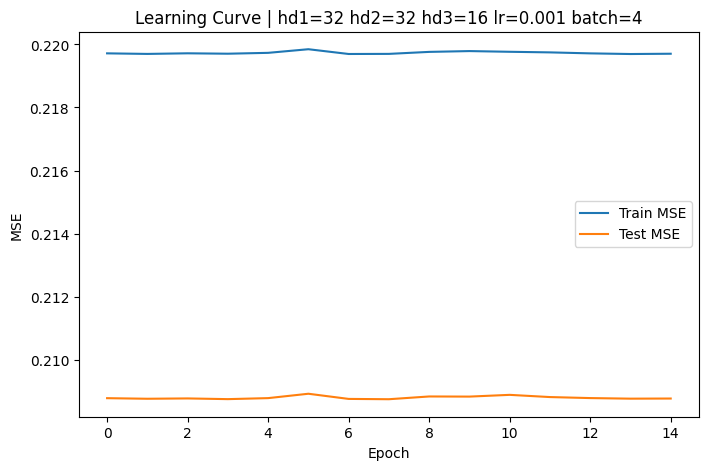


Deneme: hd1=32, hd2=32, hd3=16, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 9
Kombinasyon En iyi Test MSE: 0.2088


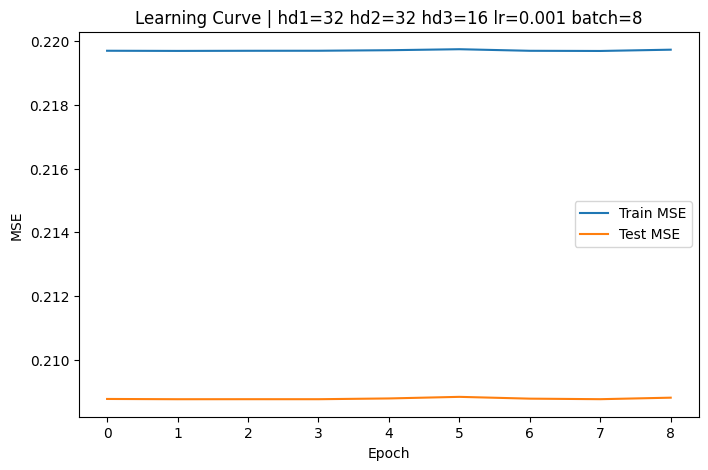


Deneme: hd1=32, hd2=32, hd3=16, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 11 | Train MSE: 0.2197 | Test MSE: 0.2088
Early stopping at epoch 11
Kombinasyon En iyi Test MSE: 0.2088


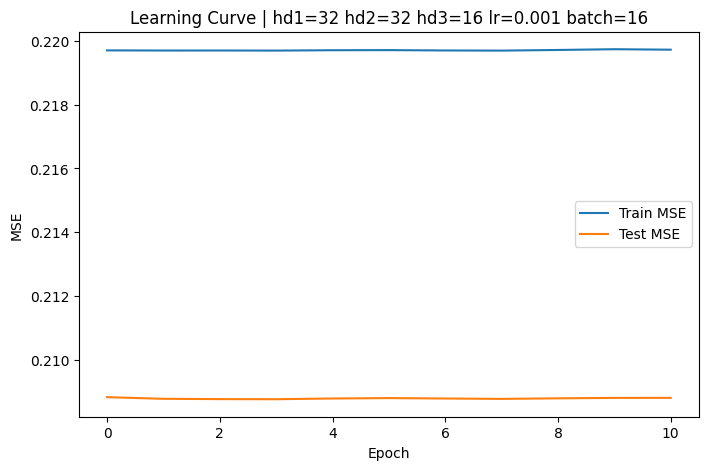


Deneme: hd1=32, hd2=32, hd3=32, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2087
Epoch 4 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2198 | Test MSE: 0.2089
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2202 | Test MSE: 0.2092
Early stopping at epoch 10
Kombinasyon En iyi Test MSE: 0.2087


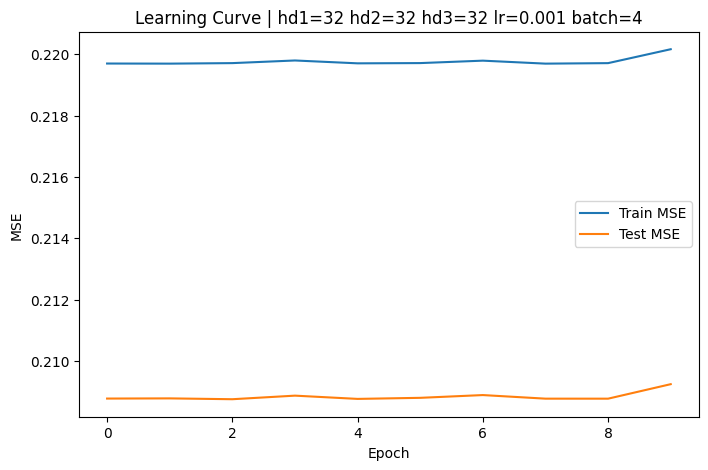


Deneme: hd1=32, hd2=32, hd3=32, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 2 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 3 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 4 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 5 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 6 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 7 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 8 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 9 | Train MSE: 0.2197 | Test MSE: 0.2088
Epoch 10 | Train MSE: 0.2199 | Test MSE: 0.2089
Early stopping at epoch 10
Kombinasyon En iyi Test MSE: 0.2088


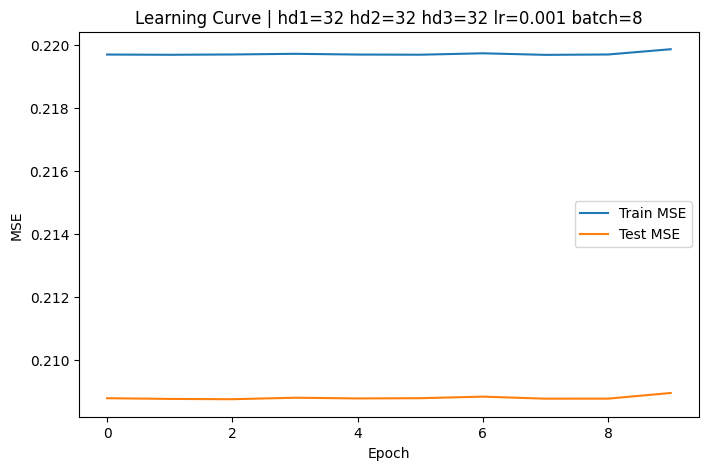


Deneme: hd1=32, hd2=32, hd3=32, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2061 | Test MSE: 0.1992
Epoch 2 | Train MSE: 0.2044 | Test MSE: 0.1951
Epoch 3 | Train MSE: 0.2041 | Test MSE: 0.1949
Epoch 4 | Train MSE: 0.2037 | Test MSE: 0.1946
Epoch 5 | Train MSE: 0.2035 | Test MSE: 0.1942
Epoch 6 | Train MSE: 0.2032 | Test MSE: 0.1939
Epoch 7 | Train MSE: 0.2030 | Test MSE: 0.1942
Epoch 8 | Train MSE: 0.2027 | Test MSE: 0.1935
Epoch 9 | Train MSE: 0.2028 | Test MSE: 0.1937
Epoch 10 | Train MSE: 0.2059 | Test MSE: 0.2003
Epoch 11 | Train MSE: 0.2026 | Test MSE: 0.1934
Epoch 12 | Train MSE: 0.2026 | Test MSE: 0.1936
Epoch 13 | Train MSE: 0.2027 | Test MSE: 0.1944
Epoch 14 | Train MSE: 0.2022 | Test MSE: 0.1939
Epoch 15 | Train MSE: 0.2023 | Test MSE: 0.1935
Epoch 16 | Train MSE: 0.2036 | Test MSE: 0.1956
Epoch 17 | Train MSE: 0.2022 | Test MSE: 0.1939
Epoch 18 | Train MSE: 0.2019 | Test MSE: 0.1938
Early stopping at epoch 18
Kombinasyon En iyi Test MSE: 0.1934


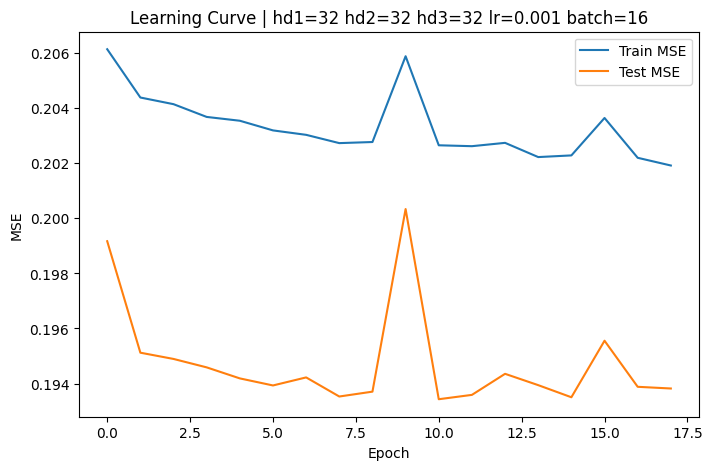

In [7]:
for hd1 in hd_list:
    for hd2 in hd_list:
        for hd3 in hd_list:
            for lr in lr_list:
                for batch_size in batch_size_list:

                    print(f"\nDeneme: hd1={hd1}, hd2={hd2}, hd3={hd3}, lr={lr}, batch_size={batch_size}")

                    np.random.seed(42)
                    W1 = np.random.randn(X1_train.shape[1], hd1) * np.sqrt(2. / X1_train.shape[1])
                    b1 = np.zeros((1, hd1))

                    W2 = np.random.randn(hd1 + X2_train.shape[1], hd2) * np.sqrt(2. / (hd1 + X2_train.shape[1]))
                    b2 = np.zeros((1, hd2))

                    W3 = np.random.randn(hd2 + X3_train.shape[1], hd3) * np.sqrt(2. / (hd2 + X3_train.shape[1]))
                    b3 = np.zeros((1, hd3))

                    W4 = np.random.randn(hd3, num_outputs) * np.sqrt(2. / hd3)
                    b4 = np.zeros((1, num_outputs))

                    best_test_mse = float('inf')
                    patience_counter = 0
                    train_mse_list, test_mse_list = [], []

                    for epoch in range(epochs):
                        permutation = np.random.permutation(X1_train.shape[0])
                        X1_sh, X2_sh, X3_sh, y_sh = X1_train[permutation], X2_train[permutation], X3_train[permutation], y_train[permutation]

                        for i in range(0, X1_train.shape[0], batch_size):
                            X1_b = X1_sh[i:i+batch_size]
                            X2_b = X2_sh[i:i+batch_size]
                            X3_b = X3_sh[i:i+batch_size]
                            y_b = y_sh[i:i+batch_size]

                            Z1 = X1_b.dot(W1) + b1
                            A1 = relu(Z1)

                            A1_cat = np.concatenate([A1, X2_b], axis=1)
                            Z2 = A1_cat.dot(W2) + b2
                            A2 = relu(Z2)

                            A2_cat = np.concatenate([A2, X3_b], axis=1)
                            Z3 = A2_cat.dot(W3) + b3
                            A3 = relu(Z3)

                            Z4 = A3.dot(W4) + b4
                            y_pred = Z4

                            dZ4 = 2 * (y_pred - y_b) / y_b.shape[0]
                            dW4 = A3.T.dot(dZ4)
                            db4 = np.sum(dZ4, axis=0, keepdims=True)

                            dA3 = dZ4.dot(W4.T)
                            dZ3 = dA3 * relu_derivative(Z3)
                            dW3 = A2_cat.T.dot(dZ3)
                            db3 = np.sum(dZ3, axis=0, keepdims=True)

                            dA2_cat = dZ3.dot(W3.T)
                            dA2 = dA2_cat[:, :A2.shape[1]]
                            dZ2 = dA2 * relu_derivative(Z2)
                            dW2 = A1_cat.T.dot(dZ2)
                            db2 = np.sum(dZ2, axis=0, keepdims=True)

                            dA1_cat = dZ2.dot(W2.T)
                            dA1 = dA1_cat[:, :A1.shape[1]]
                            dZ1 = dA1 * relu_derivative(Z1)
                            dW1 = X1_b.T.dot(dZ1)
                            db1 = np.sum(dZ1, axis=0, keepdims=True)

                            W4 -= lr * dW4
                            b4 -= lr * db4
                            W3 -= lr * dW3
                            b3 -= lr * db3
                            W2 -= lr * dW2
                            b2 -= lr * db2
                            W1 -= lr * dW1
                            b1 -= lr * db1

                        A3_train = relu(np.concatenate([relu(np.concatenate([relu(X1_train.dot(W1) + b1), X2_train], axis=1).dot(W2) + b2), X3_train], axis=1).dot(W3) + b3)
                        y_train_pred = A3_train.dot(W4) + b4
                        train_mse = np.mean((y_train - y_train_pred)**2)

                        A3_test = relu(np.concatenate([relu(np.concatenate([relu(X1_test.dot(W1) + b1), X2_test], axis=1).dot(W2) + b2), X3_test], axis=1).dot(W3) + b3)
                        y_test_pred = A3_test.dot(W4) + b4
                        test_mse = np.mean((y_test - y_test_pred)**2)

                        train_mse_list.append(train_mse)
                        test_mse_list.append(test_mse)

                        print(f"Epoch {epoch+1} | Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f}")

                        if test_mse < best_test_mse:
                            best_test_mse = test_mse
                            patience_counter = 0
                            best_W1, best_b1, best_W2, best_b2 = W1.copy(), b1.copy(), W2.copy(), b2.copy()
                            best_W3, best_b3, best_W4, best_b4 = W3.copy(), b3.copy(), W4.copy(), b4.copy()
                        else:
                            patience_counter += 1
                            if patience_counter >= patience:
                                print(f"Early stopping at epoch {epoch+1}")
                                break

                    print(f"Kombinasyon En iyi Test MSE: {best_test_mse:.4f}")

                    if best_test_mse < best_mse_global:
                        best_mse_global = best_test_mse
                        best_config = (hd1, hd2, hd3, lr, batch_size)
                        final_W1, final_b1 = best_W1, best_b1
                        final_W2, final_b2 = best_W2, best_b2
                        final_W3, final_b3 = best_W3, best_b3
                        final_W4, final_b4 = best_W4, best_b4

                    plt.figure(figsize=(8,5))
                    plt.plot(train_mse_list, label='Train MSE')
                    plt.plot(test_mse_list, label='Test MSE')
                    plt.title(f'Learning Curve | hd1={hd1} hd2={hd2} hd3={hd3} lr={lr} batch={batch_size}')
                    plt.xlabel('Epoch')
                    plt.ylabel('MSE')
                    plt.legend()
                    plt.show()


4- En İyi Sonuç & Model Kaydetme

In [8]:
print(f"\n=== EN İYİ KONFİGÜRASYON ===\nhd1={best_config[0]}, hd2={best_config[1]}, hd3={best_config[2]}, lr={best_config[3]}, batch_size={best_config[4]}")
print(f"En düşük Test MSE: {best_mse_global:.4f}")

np.save("models/102_W1.npy", final_W1)
np.save("models/102_b1.npy", final_b1)
np.save("models/102_W2.npy", final_W2)
np.save("models/102_b2.npy", final_b2)
np.save("models/102_W3.npy", final_W3)
np.save("models/102_b3.npy", final_b3)
np.save("models/102_W4.npy", final_W4)
np.save("models/102_b4.npy", final_b4)

print("En iyi model 'models/' klasörüne kaydedildi.")



=== EN İYİ KONFİGÜRASYON ===
hd1=16, hd2=16, hd3=16, lr=0.001, batch_size=4
En düşük Test MSE: 0.1926
En iyi model 'models/' klasörüne kaydedildi.
